# 💽 Imports

---

In [746]:
# MAIN
import os
from math import pi
import ast

# DATA MANIPULATION
## Numpy
import numpy as np
## Pandas
import pandas as pd

# DATA VISUALIZATION

## Squarify
import squarify

## Pywaffle
from pywaffle import Waffle

## Plotly
import plotly as py
import plotly.graph_objs as go
import plotly.io as pio

## Matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
from matplotlib.pyplot import subplots
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

In [747]:
import sys
# Caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '../src/addons')

from etlAiAdoption import extractTransformLoad # type: ignore

# 🗃️ Load files

---

In [748]:
# Construct the path to the CSV file relative to the current notebook
current_file_path = os.path.abspath("main.ipynb")
current_dir = os.path.dirname(current_file_path)

extractTransformLoad(current_file_path)
# file is in a folder named 'data' in the same folder as the notebook
ai_adoption_survey_src_path = os.path.join(current_dir, "data", "cl_ai_adoption_2024.csv")

df_survey = pd.read_csv(
  ai_adoption_survey_src_path,
  delimiter=',',
  header=0,
  index_col=False
)

# Categorical for the survey
AGE_ORDER = ["18-25 ans", "25-35 ans", "35-45 ans", "45-55 ans", "55 ans et plus"]
df_survey['Age'] = pd.Categorical(df_survey['Age'], categories=AGE_ORDER, ordered=True)

FAMILIARITY_ORDER = ["Pas du tout familier", "Un peu familier", "Oui, très familier"]
df_survey['Familiarity'] = pd.Categorical(df_survey['Familiarity'], categories=FAMILIARITY_ORDER, ordered=True)

OPENNESS_ORDER = ["Très réticent", "Plutôt réticent", "Plutôt ouvert", "Très ouvert"]
df_survey['Openness'] = pd.Categorical(df_survey['Openness'], categories=OPENNESS_ORDER, ordered=True)

USAGE_ORDER = ["Jamais", "Rarement", "Parfois", "Très souvent"]
df_survey['Usage'] = pd.Categorical(df_survey['Usage'], categories=USAGE_ORDER, ordered=True)

AUTONOMY_ORDER = ["Pas du tout", "Un peu", "Moyennement", "Considérablement"]
df_survey['LossOfAutonomy'] = pd.Categorical(df_survey['LossOfAutonomy'], categories=AUTONOMY_ORDER, ordered=True)

THINKING_ORDER = ["Pas du tout", "Un peu", "Moyennement", "Considérablement"]
df_survey['ReducedThinking'] = pd.Categorical(df_survey['ReducedThinking'], categories=THINKING_ORDER, ordered=True)

TRAINING_ORDER = ["Non, probablement pas", "Peut-être", "Oui, certainement"]
df_survey['WillingnessForTraining'] = pd.Categorical(df_survey['WillingnessForTraining'], categories=TRAINING_ORDER, ordered=True)

df_survey['Tools'] = df_survey['Tools'].apply(ast.literal_eval)
df_survey['Motivations'] = df_survey['Motivations'].apply(ast.literal_eval)
df_survey['Motivations'] = df_survey['Motivations'].apply(
    lambda x: {'Aucune motivation'} if not x or all(not motivation for motivation in x) else x)

remap of industry sector: 26 to 15
remap of company department: 44 to 19
Data saved to: c:\Users\109768706\Git\paris1-iae-ai_adoption_by_employees\src\data\cl_ai_adoption_2024.csv


In [749]:
#TODO Pas de négation dans les titres pour simplifier la lecture

# 🎨 Global Design

---

In [750]:
# FONTS
## Matplotlib general set of fonts
plt.rcParams["font.family"] = "Times New Roman"
## Plotly general set of fonts
pio.templates.default = "plotly"  # Commencez avec le modèle "plotly" par défaut
pio.templates["plotly"]["layout"]["font"]["family"] = "Times New Roman"


In [751]:
F_H1 = 20
F_H2 = 17
F_H3 = 14
F_H4 = 11

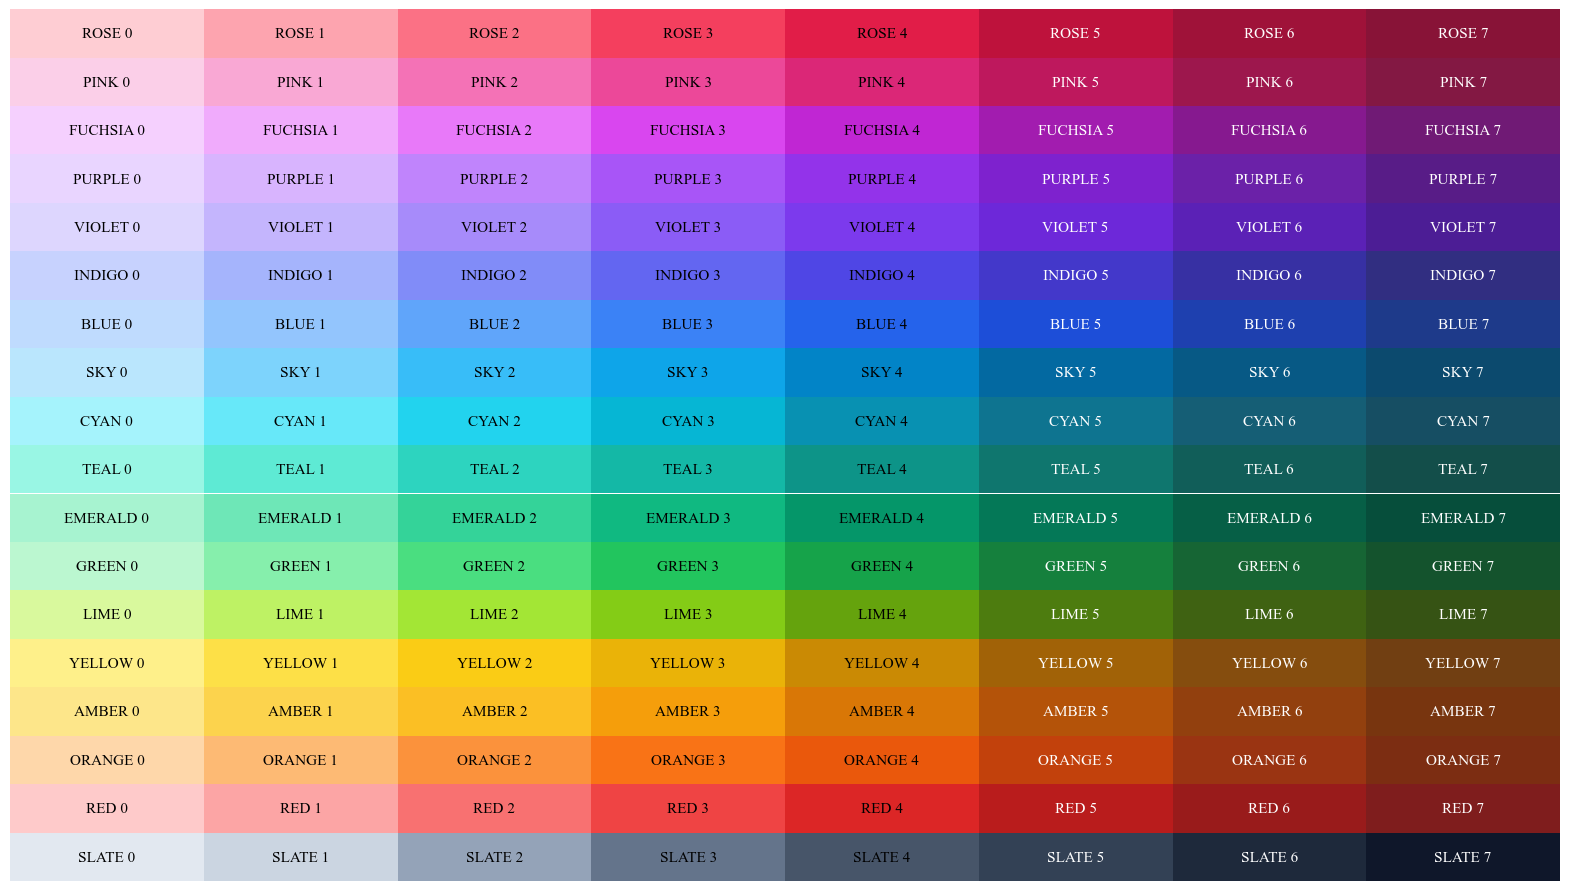

In [752]:
# COLORS
## Palette from tailwind
C_SLATE = ["#e2e8f0", "#cbd5e1", "#94a3b8", "#64748b", "#475569", "#334155", "#1e293b", "#0f172a"]
C_RED = ["#fecaca", "#fca5a5", "#f87171", "#ef4444", "#dc2626", "#b91c1c", "#991b1b", "#7f1d1d"]
C_ORANGE = ["#fed7aa", "#fdba74", "#fb923c", "#f97316", "#ea580c", "#c2410c", "#9a3412", "#7c2d12"]
C_AMBER = ["#fde68a", "#fcd34d", "#fbbf24", "#f59e0b", "#d97706", "#b45309", "#92400e", "#78350f"]
C_YELLOW = ["#fef08a", "#fde047", "#facc15", "#eab308", "#ca8a04", "#a16207", "#854d0e", "#713f12"]
C_LIME = ["#d9f99d", "#bef264", "#a3e635", "#84cc16", "#65a30d", "#4d7c0f", "#3f6212", "#365314"]
C_GREEN = ["#bbf7d0", "#86efac", "#4ade80", "#22c55e", "#16a34a", "#15803d", "#166534", "#14532d"]
C_EMERALD = ["#a7f3d0", "#6ee7b7", "#34d399", "#10b981", "#059669", "#047857", "#065f46", "#064e3b"]
C_TEAL = ["#99f6e4", "#5eead4", "#2dd4bf", "#14b8a6", "#0d9488", "#0f766e", "#115e59", "#134e4a"]
C_CYAN = ["#a5f3fc", "#67e8f9", "#22d3ee", "#06b6d4", "#0891b2", "#0e7490", "#155e75", "#164e63"]
C_SKY = ["#bae6fd", "#7dd3fc", "#38bdf8", "#0ea5e9", "#0284c7", "#0369a1", "#075985", "#0c4a6e"]
C_BLUE = ["#bfdbfe", "#93c5fd", "#60a5fa", "#3b82f6", "#2563eb", "#1d4ed8", "#1e40af", "#1e3a8a"]
C_INDIGO = ["#c7d2fe", "#a5b4fc", "#818cf8", "#6366f1", "#4f46e5", "#4338ca", "#3730a3", "#312e81"]
C_VIOLET = ["#ddd6fe", "#c4b5fd", "#a78bfa", "#8b5cf6", "#7c3aed", "#6d28d9", "#5b21b6", "#4c1d95"]
C_PURPLE = ["#e9d5ff", "#d8b4fe", "#c084fc", "#a855f7", "#9333ea", "#7e22ce", "#6b21a8", "#581c87"]
C_FUCHSIA = ["#f5d0fe", "#f0abfc", "#e879f9", "#d946ef", "#c026d3", "#a21caf", "#86198f", "#701a75"]
C_PINK = ["#fbcfe8", "#f9a8d4", "#f472b6", "#ec4899", "#db2777", "#be185d", "#9d174d", "#831843"]
C_ROSE = ["#fecdd3", "#fda4af", "#fb7185", "#f43f5e", "#e11d48", "#be123c", "#9f1239", "#881337"]

C_ALL = {
    "SLATE": C_SLATE, "RED": C_RED, "ORANGE": C_ORANGE, "AMBER": C_AMBER,
    "YELLOW": C_YELLOW, "LIME": C_LIME, "GREEN": C_GREEN, "EMERALD": C_EMERALD,
    "TEAL": C_TEAL, "CYAN": C_CYAN, "SKY": C_SKY, "BLUE": C_BLUE,
    "INDIGO": C_INDIGO, "VIOLET": C_VIOLET, "PURPLE": C_PURPLE,
    "FUCHSIA": C_FUCHSIA, "PINK": C_PINK, "ROSE": C_ROSE
}

C_PALETTE_0 = []
C_PALETTE_1 = []
C_PALETTE_2 = []
C_PALETTE_3 = []
C_PALETTE_4 = []
C_PALETTE_5 = []
C_PALETTE_6 = []
C_PALETTE_7 = []

for name, color_list in C_ALL.items():
    if name != "SLATE":
        C_PALETTE_0.append(color_list[0])
        C_PALETTE_1.append(color_list[1])
        C_PALETTE_2.append(color_list[2])
        C_PALETTE_3.append(color_list[3])
        C_PALETTE_4.append(color_list[4])
        C_PALETTE_5.append(color_list[5])
        C_PALETTE_6.append(color_list[6])
        C_PALETTE_7.append(color_list[7])

fig, ax = plt.subplots(figsize=(20, 30))
RATIO = 4

start = 0
for name, palette in C_ALL.items():
    for i, color in enumerate(palette):
        rect = patches.Rectangle((i * RATIO, start), RATIO, 1, facecolor=color)
        ax.add_patch(rect)
        ax.text((i+0.5) * RATIO, start + 0.5, f"{name} {i}", ha='center', va='center', fontsize=F_H4, color='black' if i < 5 else 'white')
    start += 1  # Décaler la prochaine palette
ax.set_xlim(0, len(C_SLATE)*RATIO)  # Ajuster la limite x pour accueillir les rectangles plus larges
ax.set_ylim(0, len(C_ALL))
ax.set_aspect('equal')
plt.axis('off')  # Cacher les axes pour une meilleure visualisation des couleurs
plt.show()

# 📌 Data function

---

In [753]:
def plot_pie(column, title):
    df = pd.DataFrame()
    if isinstance(df_survey[column].dropna().iloc[0], set):
        df = df_survey.explode(column)
    else:
        df = df_survey.copy()

    graph_df = df[column].value_counts(normalize=True, sort=False)
    others_sum = graph_df[graph_df <= 0.01].sum()
    graph_df = graph_df[graph_df > 0.01]
    if others_sum > 0:
        graph_df['Autres'] = others_sum

    colors = C_PALETTE_3  # Supposons que c'est une liste de couleurs
    if isinstance(df_survey[column].dtype, pd.CategoricalDtype):
        order = df_survey[column].cat.categories
        # Utiliser l'index de chaque catégorie pour accéder à la couleur correspondante
        colors = [C_PALETTE_3[order.tolist().index(cat)] for cat in graph_df.index if cat in order]

    # Trier graph_df du plus grand au plus petit pourcentage
    graph_df = graph_df.sort_values(ascending=False)

    plt.figure(figsize=(16, 8))
    places, texts, autotexts = plt.pie(graph_df, colors=colors, autopct=lambda p: '{:.1f}%'.format(p) if p >= 1 else '',
                                       startangle=0, counterclock=False)
    plt.legend(places, graph_df.index, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=F_H4, frameon=False)
    plt.title(title, fontsize=F_H2)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

# 🗣️ Survey Answer

---

## ❓ Question 1: Quel est votre genre ?
---

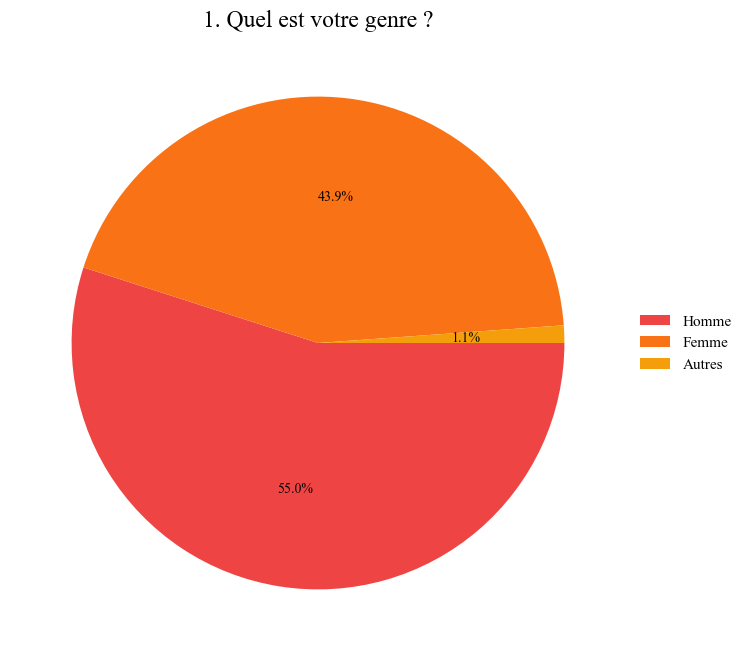

In [754]:
plot_pie('Gender', '1. Quel est votre genre ?')

## ❓ Question 2: Dans quelle tranche d’âge vous situez-vous ?
---

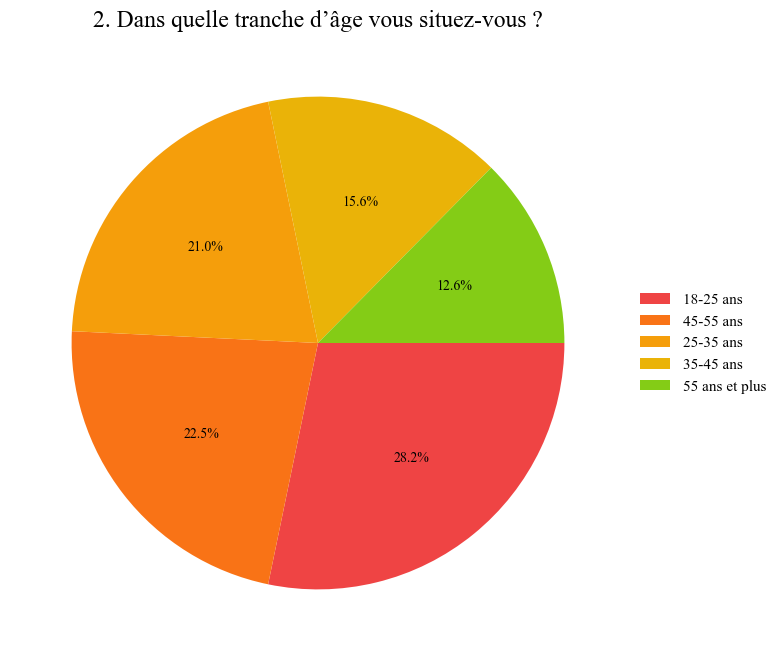

In [755]:
df_survey
plot_pie('Age', '2. Dans quelle tranche d’âge vous situez-vous ?')

### 📊 2.1. Familiarité avec IA / age

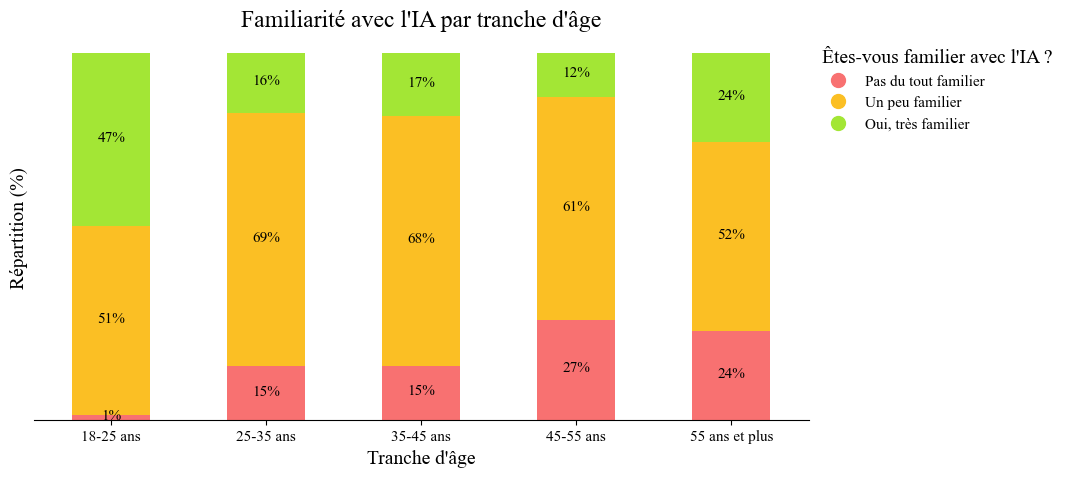

In [756]:
TINT = 2
COLORS = [C_RED[TINT], C_AMBER[TINT], C_LIME[TINT]]

# 2/5 Familiarité avec l'IA par tranche d'âge
familiarity_age = df_survey.groupby(['Age', 'Familiarity'], observed=True).size().unstack()

# Convertir les comptes en pourcentages
familiarity_age = familiarity_age.div(familiarity_age.sum(axis=1), axis=0) * 100
ax = familiarity_age.plot(kind='bar', stacked=True, color=COLORS, figsize=(10, 5))

# Masquer les bordures droite et supérieure
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Afficher les graduations uniquement sur les bordures gauche et inférieure
ax.yaxis.set_ticks_position('none')
ax.set_yticks([])

# Ajouter les pourcentages au-dessus de chaque barre
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + (height*0.5-0.5)), ha='center', color='black', fontsize=F_H4)

plt.title("Familiarité avec l'IA par tranche d'âge", fontsize=F_H2)
plt.xlabel("Tranche d'âge", fontsize=F_H3)
plt.ylabel('Répartition (%)', fontsize=F_H3)
plt.xticks(rotation=0, fontsize=F_H4)

# Créer les handles pour la légende
handles = [
    Line2D([], [], marker='o', markersize=10, color=color, label=label, linestyle='None')
    for label, color in zip(FAMILIARITY_ORDER, COLORS)
]

# Ajouter la légende au graphique
ax.legend(handles=handles,
          title="Êtes-vous familier avec l'IA ?",
          frameon=False,
          bbox_to_anchor=(1, 1),
          loc='upper left',
          title_fontsize=F_H3,
          alignment='left',
          fontsize=F_H4)


plt.show()

### 📊 2.2. Résistance par tranche d'âge

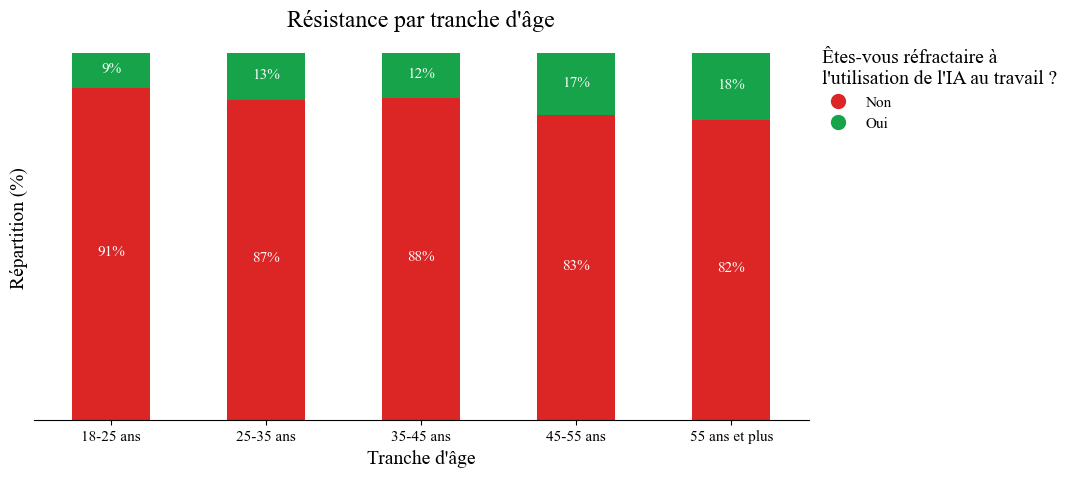

In [757]:
TINT = 4
COLORS = [C_RED[TINT], C_GREEN[TINT]]

# 2/6 Réfractaire par tranche d'âge
familiarity_age_bar = df_survey.groupby(['Age', 'Resistance'], observed=True).size().unstack()
familiarity_age_percentage = familiarity_age_bar.div(familiarity_age_bar.sum(axis=1), axis=0) * 100
ax = familiarity_age_percentage.plot(kind='bar', stacked=True, color=COLORS, figsize=(10, 5))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('none')
ax.set_yticks([])

# Add percentages on top of each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + (height*0.5-0.5)), ha='center', color='white', fontsize=F_H4)

plt.title("Résistance par tranche d'âge", fontsize=F_H2)
plt.xlabel("Tranche d'âge", fontsize=F_H3)
plt.ylabel('Répartition (%)', fontsize=F_H3)
plt.xticks(rotation=0, fontsize=F_H4)

# Créer les handles pour la légende
handles = [
    Line2D([], [], marker='o', markersize=10, color=color, label=label, linestyle='None')
    for label, color in zip(["Non", "Oui"], COLORS)
]

# Ajouter la légende au graphique
ax.legend(handles=handles,
          title="Êtes-vous réfractaire à\nl'utilisation de l'IA au travail ?",
          frameon=False,
          bbox_to_anchor=(1, 1),
          loc='upper left',
          title_fontsize=F_H3,
          alignment='left',
          fontsize=F_H4)

plt.show()

### 📉 2.4. Peur de perte en autonomie à cause de l'IA par tranche d'âge

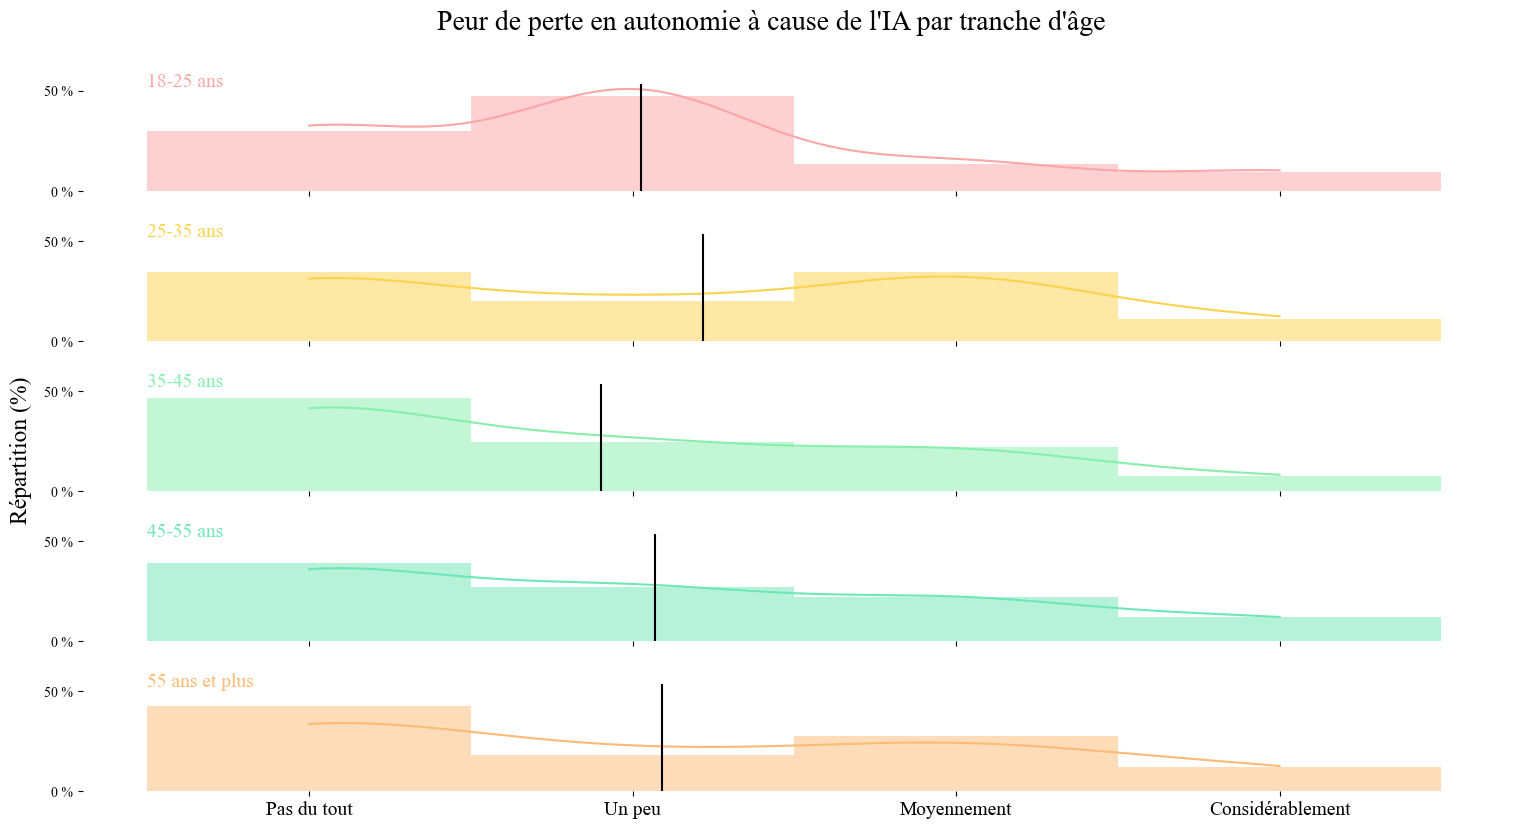

In [758]:
COLORS = [C_RED[1], C_AMBER[1], C_GREEN[1], C_EMERALD[1], C_ORANGE[1]]

# Convertir 'Age' dans le nouveau DataFrame en type catégorique avec un ordre spécifique
autonomy_by_age = df_survey.copy()

# Utiliser nos couleurs
pal = sns.color_palette(COLORS)

# Créer l'objet FacetGrid avec le nouveau DataFrame
g = sns.FacetGrid(autonomy_by_age, row='Age', hue='Age', aspect=15, height=0.75, palette=pal)

# Dimensionner la figure
g.fig.set_size_inches(15, 8)

# Ajouter les histogrammes avec kde pour chaque tranche d'âge
g.map(sns.histplot, '*LossOfAutonomy', kde=True, element="step", discrete=True, stat='probability', linewidth=0)

# Ajouter la tranche d'âge comme texte avec la couleur appropriée
for i, ax in enumerate(g.axes.flat):
    # Utiliser les catégories triées pour l'annotation
    ax.text(-0.5, 0.5, autonomy_by_age['Age'].cat.categories[i], fontsize=F_H3, color=ax.lines[-1].get_color(), ha='left', va='bottom')
    mean_value = autonomy_by_age[autonomy_by_age['Age'] == autonomy_by_age['Age'].cat.categories[i]]['*LossOfAutonomy'].mean()
    ax.axvline(mean_value, color='black')
    ax.grid(False)  # Supprimer les lignes de grille

# Supprimer les titres des axes, les yticks, et les bordures
g.set_titles("")
g.set(yticks=[0, 0.5], yticklabels=['0 %', '50 %'])
g.set(ylabel="")  # Supprimer le label y
g.despine(bottom=True, left=True)

g.fig.suptitle("Peur de perte en autonomie à cause de l'IA par tranche d'âge", fontsize=F_H1, y=1.05)
g.fig.text(x=0, y=0.5, s='Répartition (%)', fontsize=F_H2, rotation=90, ha='center', va='center')
plt.xlabel('')

labels = ['Pas du tout', 'Un peu', 'Moyennement', 'Considérablement']
g.set(xticks=range(0, 4))
g.set_xticklabels(labels=labels, fontsize=F_H3)

plt.show()

### 📜 Annexes 📊 Peur de perdre son emploi par tranche d'âge

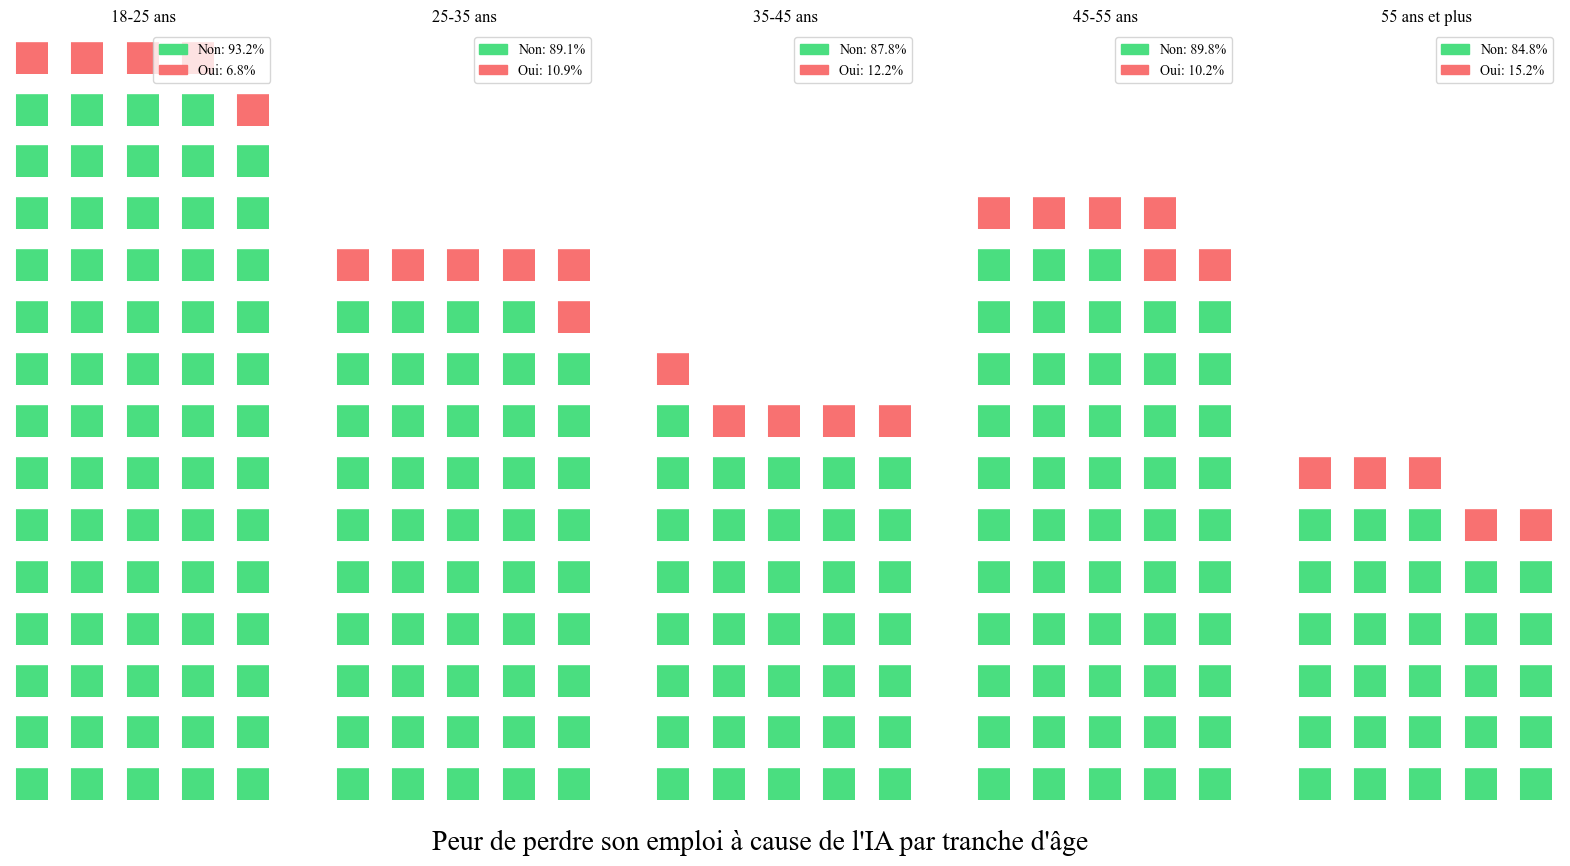

In [759]:
TINT = 2
NUMBER_OF_COLUMNS = 5

# Get the max count of each age group
max_count = df_survey['Age'].value_counts().max()
# Get the closer multiple of NUMBER_OF_COLUMNS to the max count
TOTAL_VALUES = max_count + (NUMBER_OF_COLUMNS - max_count % NUMBER_OF_COLUMNS)

# Grouping the data
fear_lose_job_age = df_survey.groupby('Age', observed=True)['FearOfJobLoss'].value_counts().unstack()

number_of_bars = len(fear_lose_job_age.index) # One bar per age range
colors = [C_GREEN[TINT], C_RED[TINT], "#ffffff"]

# Calculate the percentages for each age range
fear_lose_job_age_percentage = fear_lose_job_age.div(fear_lose_job_age.sum(axis=1), axis=0) * 100

# Init the whole figure and axes
fig, axs = plt.subplots(nrows=1, ncols=number_of_bars, figsize=(20, 10))

# We need to fill every bar with the same number of values until TOTAL_VALUES
DEFAULT_VALUE = 'empty'
for i, row in fear_lose_job_age.iterrows():
    if row.sum() < TOTAL_VALUES:
        fear_lose_job_age.loc[i, DEFAULT_VALUE] = TOTAL_VALUES - row.sum()
        fear_lose_job_age_percentage.loc[i, DEFAULT_VALUE] = 0

# Iterate over each bar and create it
for i, ax in enumerate(axs):
    row_name = fear_lose_job_age.index[i]
    values = fear_lose_job_age.loc[row_name].dropna()  # Values from the i-th row, dropping NaN values
    percentages = fear_lose_job_age_percentage.loc[row_name].dropna()  # Percentages from the i-th row, dropping NaN values

    Waffle.make_waffle(
        ax=ax,
        columns=NUMBER_OF_COLUMNS,
        colors=colors,
        values=values.to_dict(),
        characters = '■',
        font_size=50,
        vertical=True,
    )
    ax.set_title(row_name)

    # Create the legend with percentages for this subplot
    legend_elements = [mpatches.Patch(color=colors[j], 
                                      label=f"{k}: {percentages[k]:.1f}%") 
                       for j, k in enumerate(values.index) if k != DEFAULT_VALUE]

    ax.legend(handles=legend_elements, loc='upper right')

plt.figtext(0.5, 0.06, "Peur de perdre son emploi à cause de l'IA par tranche d'âge", ha='center', fontsize=F_H1)

plt.show()

### 📉 2.4.quater Répartition de la population qui apréhendent une réduction de leurs capacités de réflexion due à l'IA par tranche d'âge

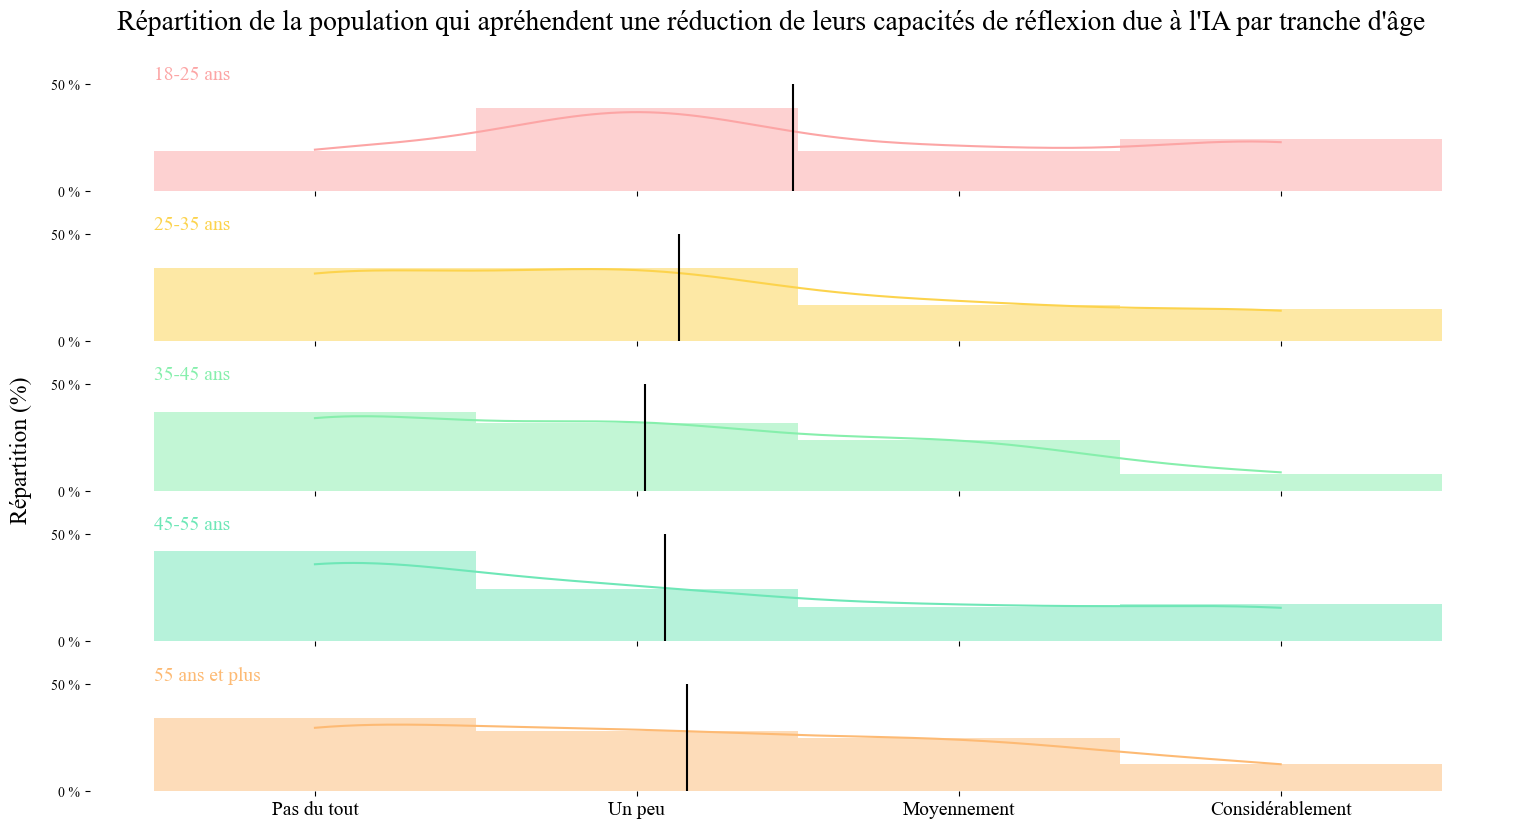

In [760]:
COLORS = [C_RED[1], C_AMBER[1], C_GREEN[1], C_EMERALD[1], C_ORANGE[1]]

# Convertir 'Age' dans le nouveau DataFrame en type catégorique avec un ordre spécifique
thinking_by_age = df_survey.copy()

# Utiliser nos couleurs
pal = sns.color_palette(COLORS)

# Créer l'objet FacetGrid avec le nouveau DataFrame
g = sns.FacetGrid(thinking_by_age, row='Age', hue='Age', aspect=15, height=0.75, palette=pal)

# Dimensionner la figure
g.fig.set_size_inches(15, 8)

# Ajouter les histogrammes avec kde pour chaque tranche d'âge
g.map(sns.histplot, '*ReducedThinking', kde=True, element="step", discrete=True, stat='probability', linewidth=0)

# Ajouter la tranche d'âge comme texte avec la couleur appropriée
for i, ax in enumerate(g.axes.flat):
    # Utiliser les catégories triées pour l'annotation
    ax.text(-0.5, 0.5, thinking_by_age['Age'].cat.categories[i], fontsize=F_H3, color=ax.lines[-1].get_color(), ha='left', va='bottom')
    mean_value = thinking_by_age[thinking_by_age['Age'] == thinking_by_age['Age'].cat.categories[i]]['*ReducedThinking'].mean()
    ax.axvline(mean_value, color='black')
    ax.grid(False)  # Supprimer les lignes de grille

# Supprimer les titres des axes, les yticks, et les bordures
g.set_titles("")
g.set(yticks=[0, 0.5], yticklabels=['0 %', '50 %'])
g.set(ylabel="")  # Supprimer le label y
g.despine(bottom=True, left=True)

g.fig.suptitle("Répartition de la population qui apréhendent une réduction de leurs capacités de réflexion due à l'IA par tranche d'âge", fontsize=F_H1, y=1.05)
g.fig.text(x=0, y=0.5, s='Répartition (%)', fontsize=F_H2, rotation=90, ha='center', va='center')
plt.xlabel('')

labels = ['Pas du tout', 'Un peu', 'Moyennement', 'Considérablement']
g.set(xticks=range(0, 4))
g.set_xticklabels(labels=labels, fontsize=F_H3)

plt.show()

## ❓ 3&4. Dans quel secteur d'activité êtes vous ?
---

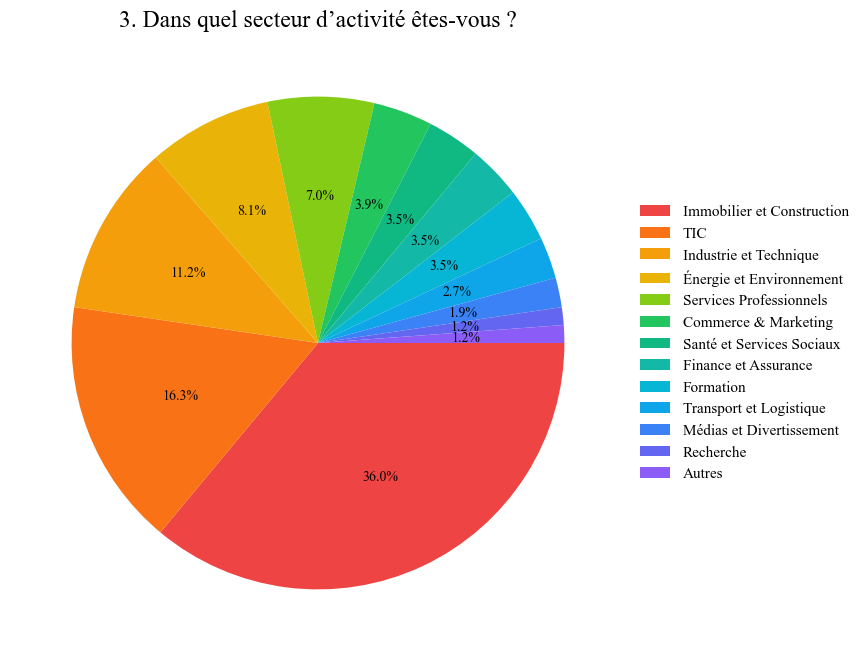

In [761]:
plot_pie('Sector', '3. Dans quel secteur d’activité êtes-vous ?')

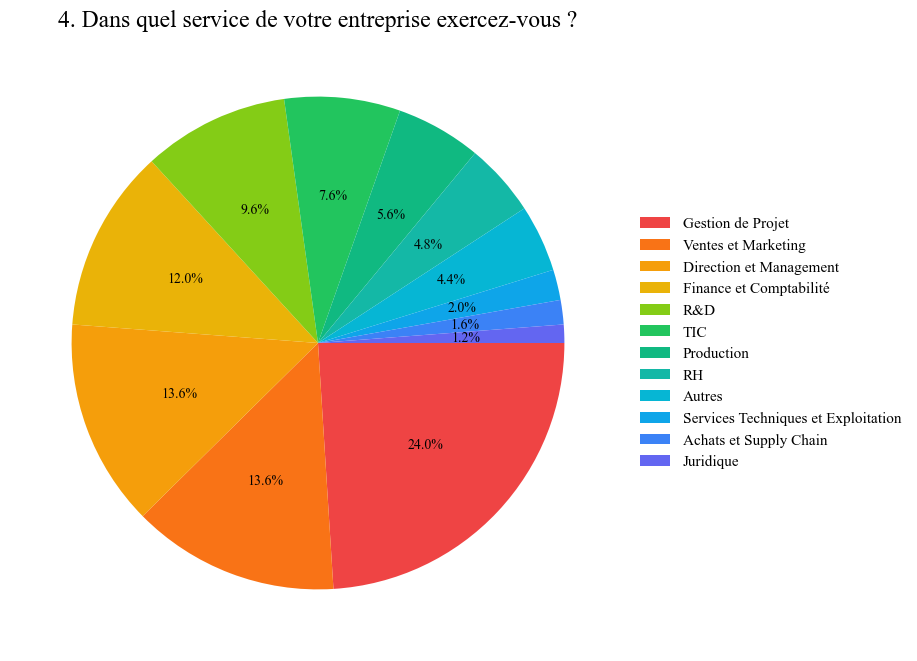

In [762]:
plot_pie('Department', '4. Dans quel service de votre entreprise exercez-vous ?')

### 🗺️ 2.2.bis Répartition de la population réfractaires à l'IA par secteur et par service

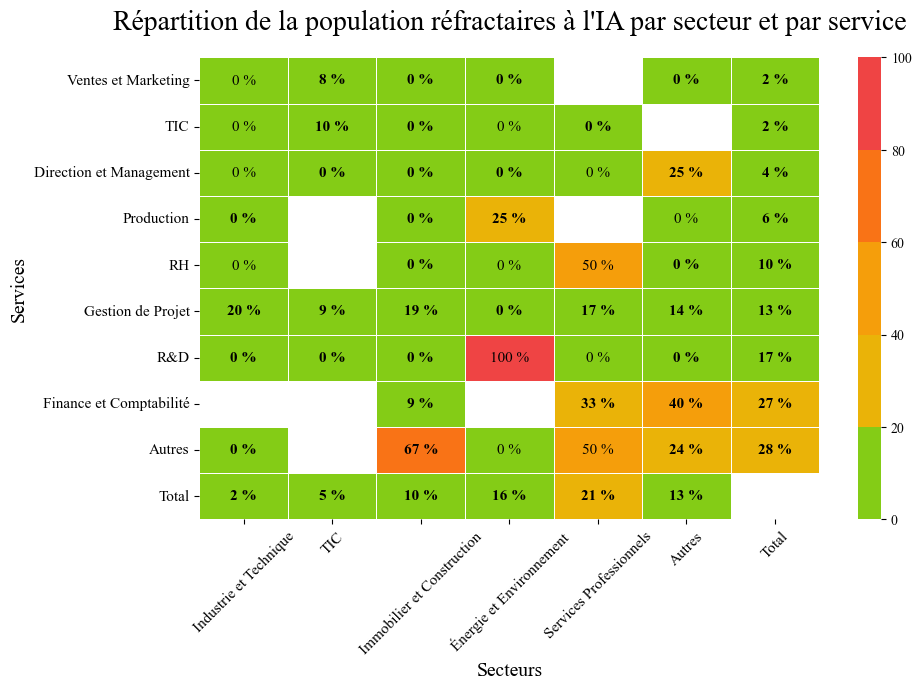

In [763]:
#TODO on peut ordonner l'affichage en fonction des %
#TODO faire des types
# 3&4/6 Resistance to AI by Sector and Department
COLORS = [C_PALETTE_3[4], C_PALETTE_3[3], C_PALETTE_3[2], C_PALETTE_3[1], C_PALETTE_3[0]]
DEPARTMENT_THRESHOLD = 10
SECTOR_THRESHOLD = 10
MIN_COUNT_THRESHOLD = 3
OTHER_LABEL = 'Autres'
TOT_LABEL = 'Total'

# Filter departments and sectors with more than threshold responses
valid_departments = df_survey['Department'].value_counts()[lambda x: x > DEPARTMENT_THRESHOLD].index
valid_sectors = df_survey['Sector'].value_counts()[lambda x: x > SECTOR_THRESHOLD].index

# Filter dataframe based on valid departments and sectors
filtered_df = df_survey[df_survey['Department'].isin(valid_departments) & df_survey['Sector'].isin(valid_sectors)]
filtered_df = filtered_df[['Department', 'Sector', 'Resistance']]

# Add OTHERS
for index, row in df_survey.iterrows():
    new_rows = []
    if row['Department'] in valid_departments:
        if row['Sector'] not in valid_sectors:
            new_rows.append({'Department': row['Department'], 'Sector': OTHER_LABEL, 'Resistance': row['Resistance']})
    if row['Sector'] in valid_sectors:
        if row['Department'] not in valid_departments:
            new_rows.append({'Department': OTHER_LABEL, 'Sector': row['Sector'], 'Resistance': row['Resistance']})
    else:
        new_rows.append({'Department': OTHER_LABEL, 'Sector': OTHER_LABEL, 'Resistance': row['Resistance']})

    filtered_df = pd.concat([filtered_df, pd.DataFrame(new_rows)], ignore_index=True)

all_sectors = list(valid_sectors) + [OTHER_LABEL]
all_departments = list(valid_departments) + [OTHER_LABEL]

# Calculate percentage of 'Non' for each valid sector and department
table_data = pd.DataFrame(index=all_departments, columns=all_sectors, dtype=float)
table_data_count = pd.DataFrame(index=all_departments, columns=all_sectors, dtype=int)

department_totals = {department: 0 for department in all_departments}
sector_totals = {sector: 0 for sector in all_sectors}

for department in all_departments:
    for sector in all_sectors:
        subset = filtered_df[(filtered_df['Department'] == department) & (filtered_df['Sector'] == sector)]
        count = len(subset)
        if len(subset) > 0:
            percentage = (1-(subset['Resistance'].value_counts(normalize=True).get('Non', 0))) * 100
            table_data.loc[department, sector] = percentage
            department_totals[department] += percentage
            sector_totals[sector] += percentage
        table_data_count.loc[department, sector] = count

# Calculate average totals
for department in department_totals:
    department_totals[department] /= table_data.loc[department].count()
for sector in sector_totals:
    sector_totals[sector] /= table_data[sector].count()

# Add totals to the table
for department in all_departments:
    table_data.loc[department, TOT_LABEL] = department_totals[department]
    table_data_count.loc[department, TOT_LABEL] = sum(table_data_count.loc[department, all_sectors])
for sector in all_sectors:
    table_data.loc[TOT_LABEL, sector] = sector_totals[sector]
    table_data_count.loc[TOT_LABEL, sector] = sum(table_data_count.loc[all_departments, sector])

# Sort rows and columns by total values
sorted_departments = table_data[TOT_LABEL].sort_values().index
sorted_sectors = table_data.loc[TOT_LABEL].sort_values().index

# Move OTHER_LABEL just before TOT_LABEL
if OTHER_LABEL in sorted_departments:
    sorted_departments = sorted_departments.drop(OTHER_LABEL).insert(-1, OTHER_LABEL)
if OTHER_LABEL in sorted_sectors:
    sorted_sectors = sorted_sectors.drop(OTHER_LABEL).insert(-1, OTHER_LABEL)

# Reorder table_data and table_data_count
table_data = table_data.loc[sorted_departments, sorted_sectors]
table_data_count = table_data_count.loc[sorted_departments, sorted_sectors]

cmap = mcolors.ListedColormap(COLORS)

# Plot heatmap with red background
plt.figure(figsize=(10, 6))
ax = sns.heatmap(table_data, cmap=cmap, cbar=True, linewidths=.5)

# Add annotations manually
for i in range(table_data_count.shape[0]):
    for j in range(table_data_count.shape[1]):
        if not pd.isna(table_data.iloc[i, j]):
            if table_data_count.iloc[i, j] >= MIN_COUNT_THRESHOLD:
                ax.text(j+0.5, i+0.5, f"{table_data.iloc[i, j]:.0f} %",
                        color='black', ha='center', va='center',
                        fontweight='bold', fontsize=F_H4)
            else:
                ax.text(j+0.5, i+0.5, f"{table_data.iloc[i, j]:.0f} %",
                        color='black', ha='center', va='center',
                        fontsize=F_H4)

plt.title("Répartition de la population réfractaires à l'IA par secteur et par service", fontsize=F_H1, pad=20)
plt.xlabel('Secteurs', fontsize=F_H3)
plt.ylabel('Services', fontsize=F_H3)
plt.xticks(rotation=45, fontsize=F_H4)
plt.yticks(fontsize=F_H4)
plt.show()

### 📜 Annexe 🎻 Utilisation de l'IA par tranche d'âge

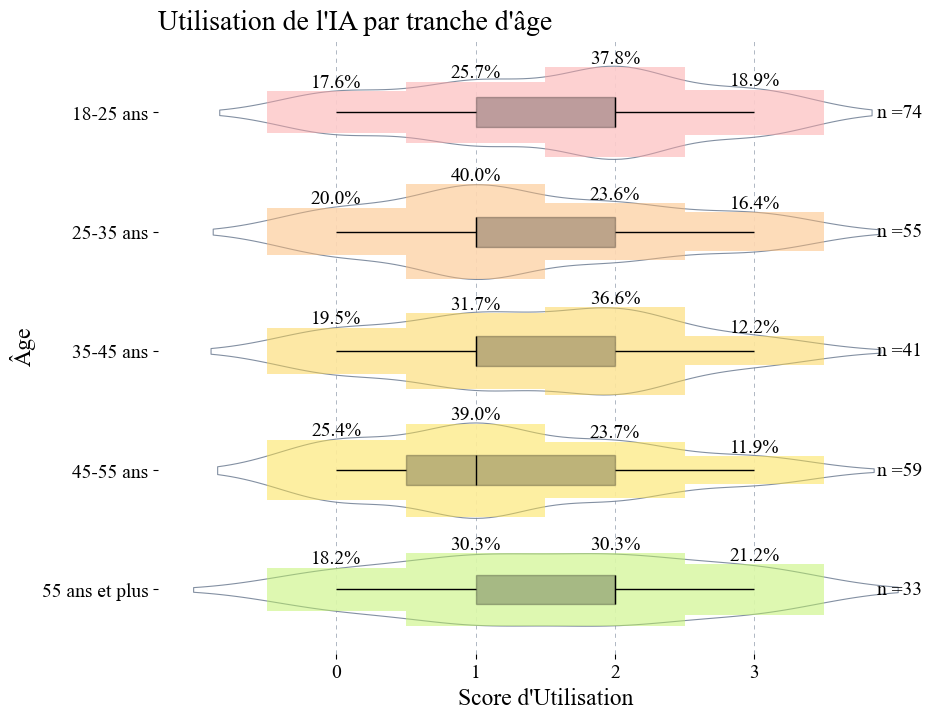

In [764]:
COLORS = C_PALETTE_1

# Trier df_survey par 'Age'
df_survey_sorted = df_survey.sort_values('Age')

# afficher le n
fig, ax = plt.subplots(figsize=(10, 8))  # Ajustement de la taille pour mieux s'adapter à l'inversion des axes

usage_by_age = df_survey_sorted.groupby('Age', observed=True)['*Usage'].value_counts(normalize=True).unstack().fillna(0)

# Configuration de l'arrière-plan
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Ajout de lignes verticales comme référence d'échelle
for h in [0, 1, 2, 3]:
    ax.axvline(h, color=C_SLATE[3], ls=(0, (5, 5)), alpha=0.6, zorder=0, linewidth=0.6)

# Ajout des violons inversés
violins = sns.violinplot(y='Age', x='*Usage', data=df_survey_sorted, ax=ax, inner=None, color='lightgrey', orient='h')

# # Personnalisation des violons
for pc in violins.collections:
    pc.set_edgecolor(C_SLATE[3])
    pc.set_facecolor('white')
    pc.set_linewidth(0.8)
    pc.set_alpha(0.8)

# Ajout des moyennes, ajustées pour l'inversion des axes
means = df_survey_sorted.groupby('Age', observed=True)['*Usage'].mean().values
ages = sorted(df_survey_sorted['Age'].unique())

# for i, mean in enumerate(means):
#     ax.scatter(mean, i, s=20, color='black', zorder=3)
#     ax.text(mean + 0.05, i, r"${\mu} = $" + str(round(mean, 2)), fontsize=F_H3, ha='left', va='center')

# Ajout d'un boxplot inversé
sns.boxplot(y='Age', x='*Usage', data=df_survey_sorted, ax=ax, boxprops=dict(alpha=.25), width=0.25, orient='h', color='black', showcaps=False)

total_users_by_age = df_survey_sorted.groupby('Age', observed=True).size()

for i, age in enumerate(ages):
  total = total_users_by_age[age]
  for usage in range(4):
    percentage = usage_by_age.loc[age, usage] * 100
    ax.text(usage, i - usage_by_age.loc[age, usage], f'{percentage:.1f}%', ha='center', va='bottom', color='black', fontsize=F_H3)
    ax.barh(i, 1, left=usage-0.5, height=usage_by_age.loc[age, usage]*2, color=COLORS[i % len(COLORS)], alpha=0.5)
  # add total
  ax.text(4.2, i, f'n ={total}', ha='right', va='center', color='black', fontsize=F_H3)

# Configuration des axes et du titre
ax.set_title("Utilisation de l'IA par tranche d'âge", loc='left', fontsize=F_H1)
ax.set_ylabel('Âge', fontsize=F_H2)
ax.set_xlabel("Score d'Utilisation", fontsize=F_H2)

plt.yticks(rotation=0, ha='right', fontsize=F_H3)
plt.xticks(fontsize=F_H3)

# Suppression des bordures
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Afficher uniquement les valeurs de 0 à 3 sur l'axe des x
ax.set_xticks(range(4))

plt.show()

### 🗺️ 2.4.ter Répartition de la population qui apréhendent la perte de leur emploi face à l'IA par secteur et service

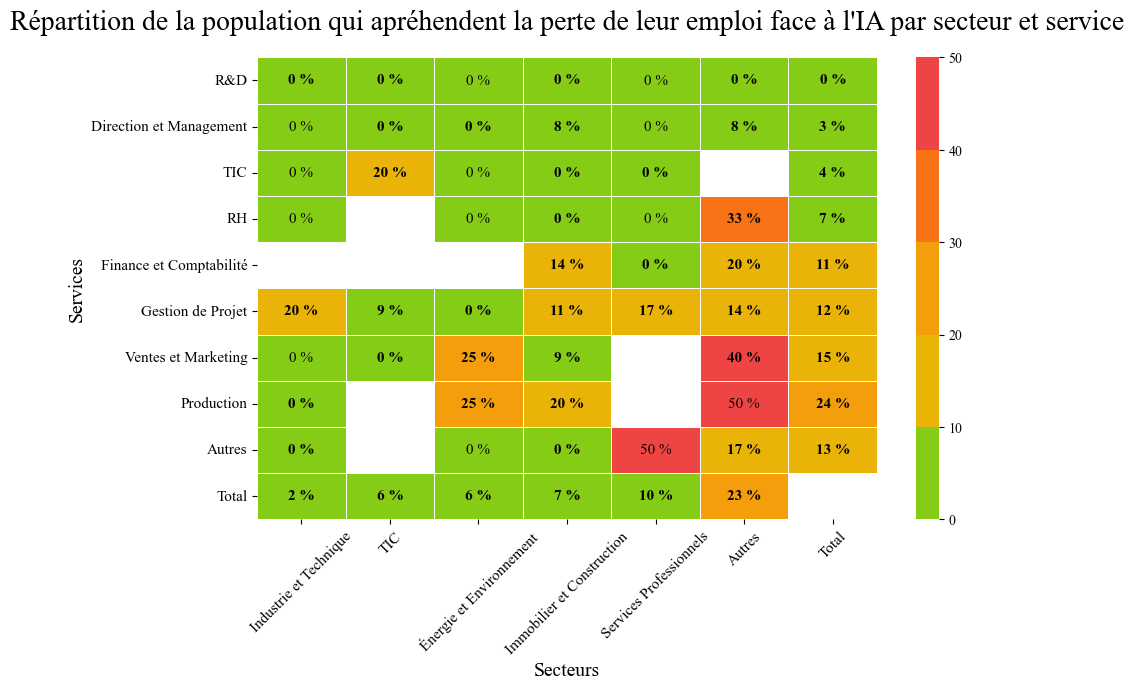

In [765]:
COLORS = [C_PALETTE_3[4], C_PALETTE_3[3], C_PALETTE_3[2], C_PALETTE_3[1], C_PALETTE_3[0]]
DEPARTMENT_THRESHOLD = 10
SECTOR_THRESHOLD = 10
MIN_COUNT_THRESHOLD = 3
OTHER_LABEL = 'Autres'
TOT_LABEL = 'Total'

# Filter departments and sectors with more than threshold responses
valid_departments = df_survey['Department'].value_counts()[lambda x: x > DEPARTMENT_THRESHOLD].index
valid_sectors = df_survey['Sector'].value_counts()[lambda x: x > SECTOR_THRESHOLD].index

# Filter dataframe based on valid departments and sectors
filtered_df = df_survey[df_survey['Department'].isin(valid_departments) & df_survey['Sector'].isin(valid_sectors)]
filtered_df = filtered_df[['Department', 'Sector', 'FearOfJobLoss']]

for index, row in df_survey.iterrows():
    new_rows = []
    if row['Department'] in valid_departments:
        if row['Sector'] not in valid_sectors:
            new_rows.append({'Department': row['Department'], 'Sector': OTHER_LABEL, 'FearOfJobLoss': row['FearOfJobLoss']})
    if row['Sector'] in valid_sectors:
        if row['Department'] not in valid_departments:
            new_rows.append({'Department': OTHER_LABEL, 'Sector': row['Sector'], 'FearOfJobLoss': row['FearOfJobLoss']})
    else:
        new_rows.append({'Department': OTHER_LABEL, 'Sector': OTHER_LABEL, 'FearOfJobLoss': row['FearOfJobLoss']})

    filtered_df = pd.concat([filtered_df, pd.DataFrame(new_rows)], ignore_index=True)

all_sectors = list(valid_sectors) + [OTHER_LABEL]
all_departments = list(valid_departments) + [OTHER_LABEL]

# Calculate percentage of 'Non' for each valid sector and department
table_data = pd.DataFrame(index=all_departments, columns=all_sectors, dtype=float)
table_data_count = pd.DataFrame(index=all_departments, columns=all_sectors, dtype=int)

department_totals = {department: 0 for department in all_departments}
sector_totals = {sector: 0 for sector in all_sectors}

for department in all_departments:
    for sector in all_sectors:
        subset = filtered_df[(filtered_df['Department'] == department) & (filtered_df['Sector'] == sector)]
        count = len(subset)
        if len(subset) > 0:
            percentage = (1-(subset['FearOfJobLoss'].value_counts(normalize=True).get('Non', 0))) * 100
            table_data.loc[department, sector] = percentage
            department_totals[department] += percentage
            sector_totals[sector] += percentage
        table_data_count.loc[department, sector] = count

# Calculate average totals
for department in department_totals:
    department_totals[department] /= table_data.loc[department].count()
for sector in sector_totals:
    sector_totals[sector] /= table_data[sector].count()

# Add totals to the table
for department in all_departments:
    table_data.loc[department, TOT_LABEL] = department_totals[department]
    table_data_count.loc[department, TOT_LABEL] = sum(table_data_count.loc[department, all_sectors])
for sector in all_sectors:
    table_data.loc[TOT_LABEL, sector] = sector_totals[sector]
    table_data_count.loc[TOT_LABEL, sector] = sum(table_data_count.loc[all_departments, sector])

# Sort rows and columns by total values
sorted_departments = table_data[TOT_LABEL].sort_values().index
sorted_sectors = table_data.loc[TOT_LABEL].sort_values().index

# Move OTHER_LABEL just before TOT_LABEL
if OTHER_LABEL in sorted_departments:
    sorted_departments = sorted_departments.drop(OTHER_LABEL).insert(-1, OTHER_LABEL)
if OTHER_LABEL in sorted_sectors:
    sorted_sectors = sorted_sectors.drop(OTHER_LABEL).insert(-1, OTHER_LABEL)

# Reorder table_data and table_data_count
table_data = table_data.loc[sorted_departments, sorted_sectors]
table_data_count = table_data_count.loc[sorted_departments, sorted_sectors]

cmap = mcolors.ListedColormap(COLORS)

# Plot heatmap with red background
plt.figure(figsize=(10, 6))
ax = sns.heatmap(table_data, cmap=cmap, cbar=True, linewidths=.5)

# Add annotations manually
for i in range(table_data_count.shape[0]):
    for j in range(table_data_count.shape[1]):
        if not pd.isna(table_data.iloc[i, j]):
            if table_data_count.iloc[i, j] >= MIN_COUNT_THRESHOLD:
                ax.text(j+0.5, i+0.5, f"{table_data.iloc[i, j]:.0f} %",
                        color='black', ha='center', va='center',
                        fontweight='bold', fontsize=F_H4)
            else:
                ax.text(j+0.5, i+0.5, f"{table_data.iloc[i, j]:.0f} %",
                        color='black', ha='center', va='center',
                        fontsize=F_H4)

plt.title("Répartition de la population qui apréhendent la perte de leur emploi face à l'IA par secteur et service", fontsize=F_H1, pad=20)
plt.xlabel('Secteurs', fontsize=F_H3)
plt.ylabel('Services', fontsize=F_H3)
plt.xticks(rotation=45, fontsize=F_H4)
plt.yticks(fontsize=F_H4)
plt.show()

## ❓ 5. Êtes-vous familier avec l'IA ?
---

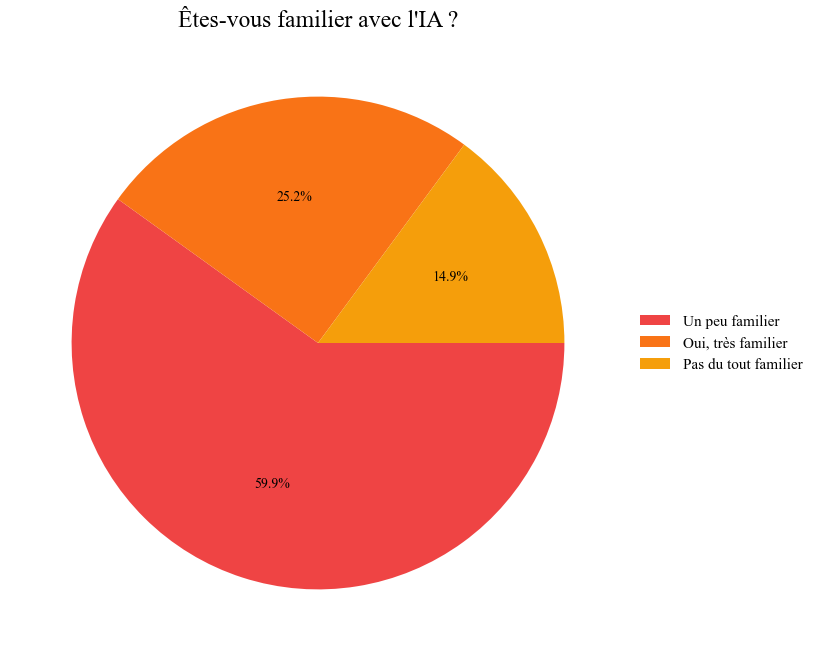

In [766]:
plot_pie('Familiarity', "Êtes-vous familier avec l'IA ?")

### 📜 Annexe 🪟 Corrélation entre l'utilisation, la familiarité et le nombre d'outils IA

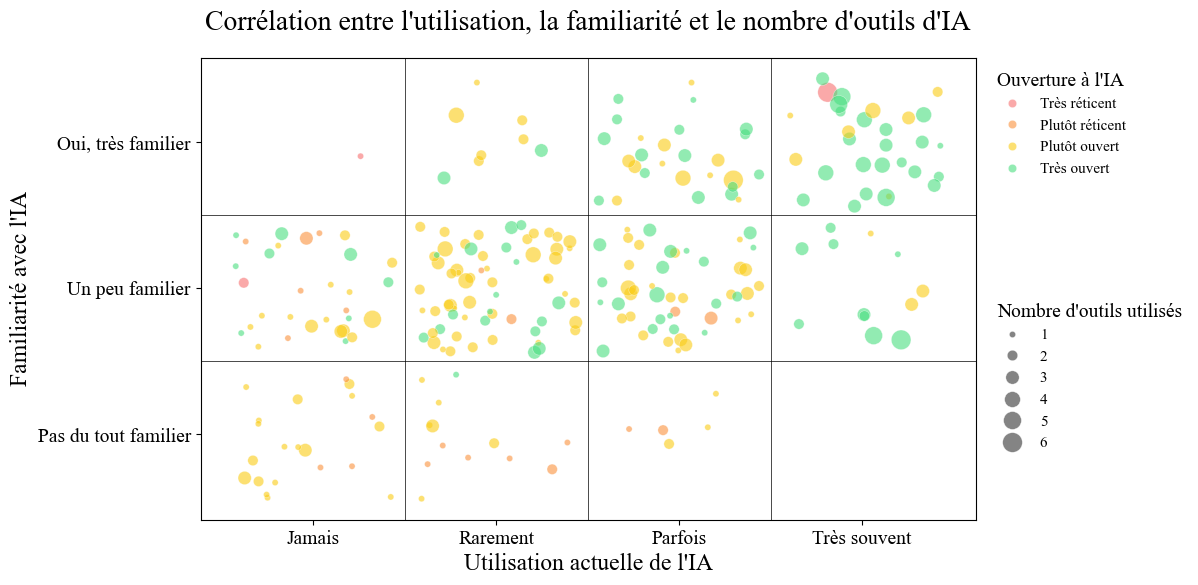

In [767]:
TINT = 2
COLORS = [C_RED[TINT], C_ORANGE[TINT], C_YELLOW[TINT], C_GREEN[TINT]]

df_familiarity_tools = df_survey[['*Familiarity', '*Usage', 'Tools', '*Openness']].copy()

df_familiarity_tools['num_tools'] = df_familiarity_tools['Tools'].apply(len)

jitter_strength = 0.44
df_familiarity_tools['*Familiarity'] = df_familiarity_tools['*Familiarity'].apply(lambda x: x + np.random.uniform(-jitter_strength, jitter_strength))
df_familiarity_tools['*Usage'] = df_familiarity_tools['*Usage'].apply(lambda x: x + np.random.uniform(-jitter_strength, jitter_strength))

# Visualisation avec seaborn
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df_familiarity_tools, x='*Usage', y='*Familiarity', size='num_tools',
                     sizes=(20, 200), hue='*Openness', palette=COLORS, alpha=0.6)

# Ajout des lignes de grille
for x in range(3):
    plt.axvline(x+0.5, color='black', linewidth=0.5)
for y in range(2):
    plt.axhline(y+0.5, color='black', linewidth=0.5)

# Configuration des titres et labels
plt.title("Corrélation entre l'utilisation, la familiarité et le nombre d'outils d'IA", pad=20, fontsize=F_H1)
plt.xlabel("Utilisation actuelle de l'IA", fontsize=F_H2)
plt.xticks([0, 1, 2, 3], ['Jamais', 'Rarement', 'Parfois', 'Très souvent'], fontsize=F_H3)
plt.ylabel("Familiarité avec l'IA", fontsize=F_H2)
plt.yticks([0, 1, 2], ['Pas du tout familier', 'Un peu familier', 'Oui, très familier'], fontsize=F_H3)

# Récupération des handles et labels pour les légendes
handles, labels = ax.get_legend_handles_labels()

# Séparation des handles et labels pour 'Openness' et 'num_tools'
# Supposons que les premiers éléments correspondent à 'Openness'
openness_handles = handles[:len(COLORS)+1]  # +1 pour inclure le titre de la légende
openness_labels = labels[:len(COLORS)+1]

# Les éléments suivants correspondent à 'num_tools'
num_tools_handles = handles[len(COLORS)+1:]  # Ignorer le titre de la légende pour 'num_tools'
num_tools_labels = labels[len(COLORS)+1:]

# Identifier l'index de l'entrée "*Openness" et l'exclure si elle existe
if '*Openness' in openness_labels:
    index_openness = openness_labels.index('*Openness')
    del openness_handles[index_openness]
    del openness_labels[index_openness]

openness_mapping = {
    3: 'Très ouvert',
    2: 'Plutôt ouvert',
    1: 'Plutôt réticent',
    0: 'Très réticent'
}
openness_labels = [openness_mapping[int(label)] if label.isdigit() else label for label in openness_labels]

# Identifier l'index de l'entrée "num_tools" et l'exclure si elle existe
if 'num_tools' in num_tools_labels:
    index_num_tools = num_tools_labels.index('num_tools')
    del num_tools_handles[index_num_tools]
    del num_tools_labels[index_num_tools]

# Création de la première légende pour 'Openness' sans l'entrée '*Openness'
first_legend = ax.legend(openness_handles, openness_labels, title="Ouverture à l'IA",
                         bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=F_H4,
                         alignment='left', frameon=False)
first_legend.get_title().set_fontsize(F_H3)

# Ajout de la première légende à la figure pour qu'elle ne soit pas remplacée
ax.add_artist(first_legend)

# Ajout de la seconde légende pour 'num_tools' sans l'entrée 'num_tools'
legend = ax.legend(num_tools_handles, num_tools_labels, title="Nombre d'outils utilisés",
                   bbox_to_anchor=(1.01, 0.5), loc='upper left', fontsize=F_H4,
                   alignment='left', frameon=False)
legend.get_title().set_fontsize(F_H3)

plt.show()

### 📊 2.3 Confiance et familiarité dans les décisions prisent par l'IA

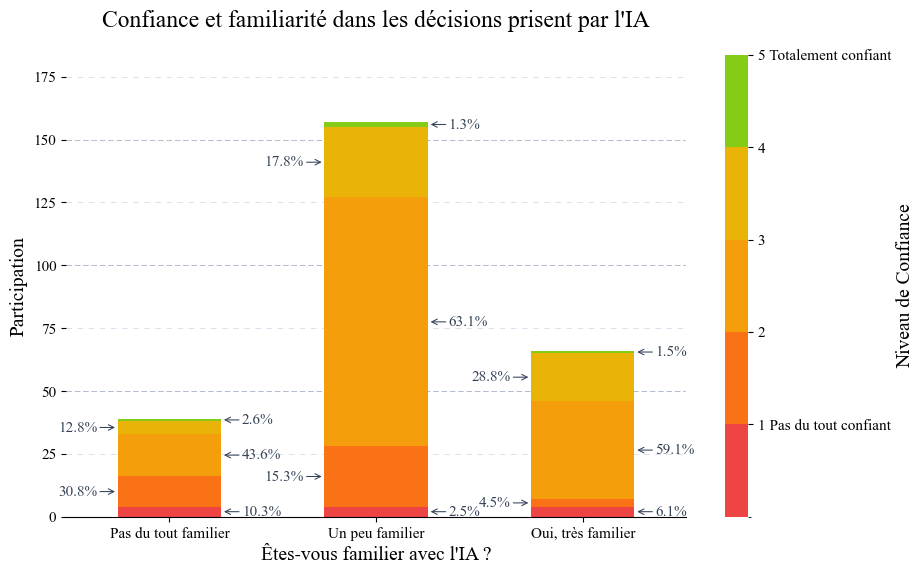

In [769]:
COLORS = [C_PALETTE_3[0], C_PALETTE_3[1], C_PALETTE_3[2], C_PALETTE_3[3], C_PALETTE_3[4]]

trust_and_familiarity = df_survey.groupby('Familiarity', observed=True)['Trust'].value_counts().unstack()
ax = trust_and_familiarity.plot(kind='bar', stacked=True, color=COLORS, figsize=(10, 6))

# Ajout de traits horizontaux
for y in np.arange(0, 176, 25):
    if y % 50 == 0:  # Pour les multiples de 50
        ax.axhline(y=y, color=C_SLATE[2], linestyle='--', dashes=[8, 4], linewidth=0.5, zorder=0)
    else:  # Pour les autres multiples de 25
        ax.axhline(y=y, color=C_SLATE[1], linestyle='--', dashes=[8, 8], linewidth=0.5, zorder=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title("Confiance et familiarité dans les décisions prisent par l'IA", fontsize=F_H2, pad=20)
plt.xlabel("Êtes-vous familier avec l'IA ?", fontsize=F_H3)
plt.ylabel('Participation', fontsize=F_H3)
plt.xticks(rotation=0, fontsize=F_H4)
plt.yticks(np.arange(0, 176, 25), fontsize=F_H4)


# Création d'une colorbar comme légende
likert_scale = ['1 Pas du tout confiant', '2', '3', '4', '5 Totalement confiant']

# Création d'une colormap
cmap = mcolors.ListedColormap(COLORS)
norm = mcolors.BoundaryNorm(boundaries=np.arange(1, 7), ncolors=5)

# Création d'une colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Ajout de la colorbar au graphique
cbar = plt.colorbar(sm, ax=ax, ticks=np.arange(2, 7), pad=0.05)
cbar.ax.set_yticklabels(likert_scale)
cbar.set_label('Niveau de Confiance', fontsize=F_H3)
cbar.ax.tick_params(labelsize=F_H4)

# Suppression de la bordure noire autour des cases de la colorbar
cbar.outline.set_visible(False)

# Suppression de la légende existante, si nécessaire
if ax.get_legend() is not None:
    ax.get_legend().remove()

#Afficher les pourcentages
trust_and_familiarity_percentage = trust_and_familiarity.div(trust_and_familiarity.sum(axis=1), axis=0) * 100

X_OFFSET = 0.35
ARROW_LENGTH = 0.1
ALTERNATIVE_DELTA = 0.15
for idx, (familiarity, row) in enumerate(trust_and_familiarity_percentage.iterrows()):
    cumulative_height = 0
    counter = 0
    for trust, percentage in row.items():
        height = trust_and_familiarity.loc[familiarity, trust]
        cumulative_height += height
        y_pos = cumulative_height - height / 2
        x_pos = 0
        arrow_props = dict(arrowstyle='<-', lw=0.75, color=C_SLATE[5])
        if (counter % 2 == 1):
            x_pos = idx - X_OFFSET
            ax.text(x_pos, y_pos, f'{percentage:.1f}%', ha='right', va='center', fontsize=F_H4, color=C_SLATE[5])
            ax.annotate('', xy=(x_pos, y_pos), xytext=(x_pos+ARROW_LENGTH, y_pos), arrowprops=arrow_props)
        else :
            x_pos = idx + X_OFFSET
            ax.text(x_pos, y_pos, f'{percentage:.1f}%', ha='left', va='center', fontsize=F_H4, color=C_SLATE[5])
            ax.annotate('', xy=(x_pos, y_pos), xytext=(x_pos-ARROW_LENGTH, y_pos), arrowprops=arrow_props)
        counter += 1


# Affichage du graphique
plt.show()

### 📊 2.4.bis. Confiance dans les décisions de l'IA en fonction de la peur de la perte d'emploi

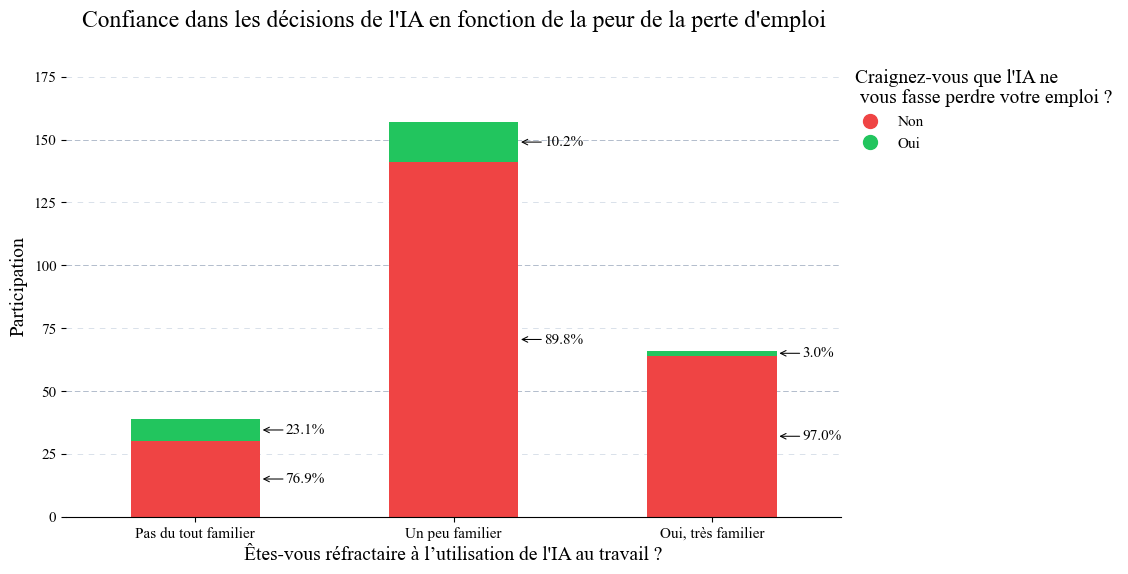

In [770]:
TINT = 3
COLORS = [C_RED[TINT], C_GREEN[TINT]]

trust_and_fear = df_survey.groupby('Familiarity', observed=True)['FearOfJobLoss'].value_counts().unstack()
ax = trust_and_fear.plot(kind='bar', stacked=True, color=COLORS, figsize=(10, 6))

# Ajout de traits horizontaux
for y in np.arange(0, 176, 25):
    if y % 50 == 0:  # Pour les multiples de 50
        ax.axhline(y=y, color=C_SLATE[2], linestyle='--', dashes=[8, 4], linewidth=0.5, zorder=0)
    else:  # Pour les autres multiples de 25
        ax.axhline(y=y, color=C_SLATE[1], linestyle='--', dashes=[8, 8], linewidth=0.5, zorder=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title("Confiance dans les décisions de l'IA en fonction de la peur de la perte d'emploi", fontsize=F_H2, pad=20)
plt.xlabel("Êtes-vous réfractaire à l’utilisation de l'IA au travail ?", fontsize=F_H3)
plt.ylabel('Participation', fontsize=F_H3)
plt.xticks(rotation=0, fontsize=F_H4)
plt.yticks(np.arange(0, 176, 25), fontsize=F_H4)

# Créer les handles pour la légende
handles = [
    Line2D([], [], marker='o', markersize=10, color=color, label=label, linestyle='None')
    for label, color in zip(["Non", "Oui"], COLORS)
]

# Ajouter la légende au graphique
ax.legend(handles=handles,
          title="Craignez-vous que l'IA ne\n vous fasse perdre votre emploi ?",
          frameon=False,
          bbox_to_anchor=(1, 1),
          loc='upper left',
          title_fontsize=F_H3,
          alignment='left',
          fontsize=F_H4)

trust_and_fear_percentage = trust_and_fear.div(trust_and_fear.sum(axis=1), axis=0) * 100

X_OFFSET = 0.35
ARROW_LENGTH = 0.1
for idx, (familiarity, row) in enumerate(trust_and_fear_percentage.iterrows()):
    cumulative_height = 0
    for fear_of_job_loss, percentage in row.items():
        height = trust_and_fear.loc[familiarity, fear_of_job_loss]
        cumulative_height += height
        y_pos = cumulative_height - height / 2
        ax.text(idx + X_OFFSET, y_pos, f'{percentage:.1f}%', ha='left', va='center', fontsize=F_H4, color='black')
        # draw an arrow to point to the left of each text label, arrow need to be the size of X_OFFSET
        ax.annotate('', xy=(idx+X_OFFSET, y_pos), xytext=(idx+X_OFFSET-ARROW_LENGTH, y_pos), arrowprops=dict(arrowstyle='<-', lw=0.75))

plt.show()

## ❓ 6. Êtes-vous réfractaire à l’utilisation de l'IA au travail ?
---

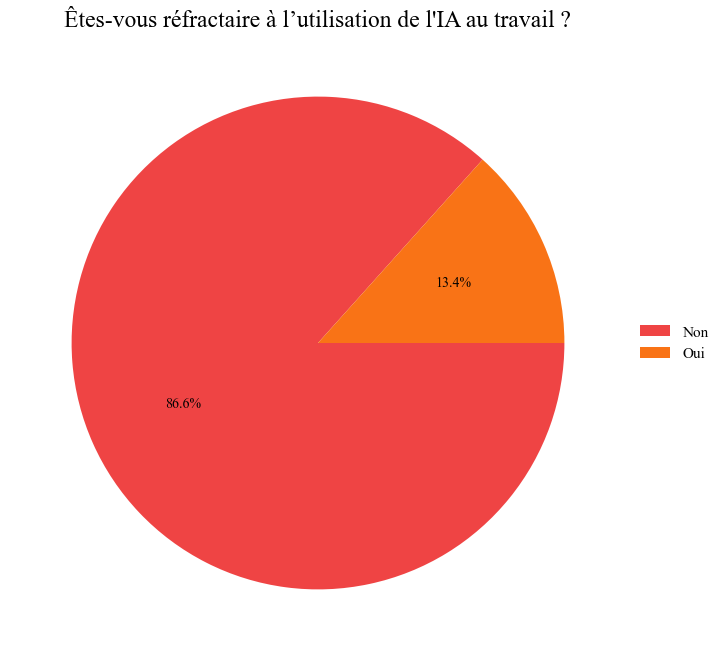

In [771]:
plot_pie('Resistance', "Êtes-vous réfractaire à l’utilisation de l'IA au travail ?")

### 🛣️ 2.2.ter Ouverture à l\'IA avant et après la lecture du texte

In [772]:
TINT = 2
TINT_DELTA = 2

df_before_after = df_survey[['Resistance', 'Openness']].copy()

# Count the occurrences of each flow
flow_counts = df_before_after.groupby(['Resistance', 'Openness'], observed=True).size().reset_index(name='count')

# Define the nodes and links for the Sankey diagram
labels = list(pd.concat([df_before_after['Resistance'], df_before_after['Openness']]).unique())

source = flow_counts['Resistance'].apply(lambda x: labels.index(x)).tolist()
target = flow_counts['Openness'].apply(lambda x: labels.index(x)).tolist()
value = flow_counts['count'].tolist()

# Define colors for each label based on specific criteria
colors = [
    C_GREEN[TINT] if label == 'Très ouvert' else
    C_YELLOW[TINT] if label == 'Plutôt ouvert' else
    C_ORANGE[TINT] if label == 'Plutôt réticent' else
    C_RED[TINT] if label == 'Très réticent' else
    C_RED[TINT+TINT_DELTA] if 'Oui' in label else
    C_GREEN[TINT+TINT_DELTA] for label in labels
]

# Create a dictionary to map labels to colors with added transparency
label_to_color_rgba = {
    label: f"rgba({int(color[1:3], 16)}, {int(color[3:5], 16)}, {int(color[5:7], 16)}, 0.5)"
    for label, color in zip(labels, colors)
}

# Generate a color scale for the links based on the target node's color with transparency
link_colors_rgba = [label_to_color_rgba[labels[t]] for t in target]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors_rgba,
        arrowlen=15
    )
)], layout=go.Layout(
    height=500,
    font=dict(size=F_H3),
    title="Ouverture à l'IA avant et après la lecture du texte",
    title_font_size=F_H1
))

# Add annotations for the question names
fig.update_layout(
    annotations=[
        dict(
            x=0,
            y=-0.1,
            xref='paper',
            yref='paper',
            text="Êtes-vous réfractaire à l’utilisation de l'IA au travail ?",
            showarrow=False,
            font=dict(size=F_H3)
        ),
        dict(
            x=1,
            y=-0.1,
            xref='paper',
            yref='paper',
            text="Après avoir lu ce texte, à quel point êtes-vous ouvert à l'idée d'utiliser des outils utilisant l'IA ?",
            showarrow=False,
            font=dict(size=F_H3)
        )
    ]
)


fig.show()


### 🛣️ 2.5. Implication de la population dans le développement d'outils basés sur l'IA et conséquences sur l'adoption

In [773]:
TINT = 2

df_before_after = df_survey[['Involved', 'WantToBeInvolved', 'ImpactOfBeingInvolved']].copy()

sankey_dict_ids = {}
sankey_dict_count = {}

for index, row in df_before_after.iterrows():
    key1 = f"1{row['Involved']}"
    key2 = f"2{row['WantToBeInvolved']}"
    key3 = f"3{row['ImpactOfBeingInvolved']}"
    if key1 not in sankey_dict_ids:
        sankey_dict_ids[key1] = len(sankey_dict_ids)
    if key2 not in sankey_dict_ids:
        sankey_dict_ids[key2] = len(sankey_dict_ids)
    if key3 not in sankey_dict_ids:
        sankey_dict_ids[key3] = len(sankey_dict_ids)
    sankey_dict_count[key1+','+key2] = sankey_dict_count.get(key1+','+key2, 0) + 1
    sankey_dict_count[key2+','+key3] = sankey_dict_count.get(key2+','+key3, 0) + 1

# Construct DataFrame for Sankey diagram
data = [{'source': sankey_dict_ids[key.split(',')[0]],
         'target': sankey_dict_ids[key.split(',')[1]],
         'value': value}
        for key, value in sankey_dict_count.items()]

df_sankey = pd.DataFrame(data)

labels = [label[1:] for label in sankey_dict_ids.keys()]
# Define colors for each label based on specific criteria
colors = [
    C_GREEN[TINT] if 'Oui' in label else
    C_RED[TINT] if 'Non' in label else
    C_SLATE[TINT] for label in labels
]

# Create a dictionary to map labels to colors with added transparency
label_to_color_rgba = {
    label: f"rgba({int(color[1:3], 16)}, {int(color[3:5], 16)}, {int(color[5:7], 16)}, 0.5)"
    for label, color in zip(labels, colors)
}
# Generate a color scale for the links based on the target node's color with transparency
link_colors_rgba = [label_to_color_rgba[labels[source]] for source in df_sankey['source']]

fig = go.Figure(data=[go.Sankey(
  node = dict(
    pad = 15,
    thickness = 20,
    line = dict(color = "black", width = 0.5),
    label = labels,
    color = colors  # Use the colors list here
  ),
  link = dict(
    source = df_sankey['source'],
    target = df_sankey['target'],
    value = df_sankey['value'],
    color = link_colors_rgba,
    arrowlen=15,
  )
)], layout=go.Layout(
    height=500,
    font=dict(size=F_H3),
    title="Implication de la population dans le développement d'outils basés sur l'IA et conséquences sur l'adoption",
    title_font_size=F_H1
))

# Add annotations for the question names
fig.update_layout(
    annotations=[
        dict(
            x=0,
            y=-0.2,
            xref='paper',
            yref='paper',
            text="Avez-vous été inclus dans l'une des<br>phases de développement d'outils basés<br>sur l'IA dans votre entreprise ?",
            showarrow=False,
            font=dict(size=F_H3)
        ),
        dict(
            x=0.5,
            y=-0.2,
            xref='paper',
            yref='paper',
            text="Dans le futur, aimeriez-vous être<br>consulté pour l'élaboration d'un outil basé<br>sur l'IA qui sera intégré dans votre entreprise ?",
            showarrow=False,
            font=dict(size=F_H3)
        ),
        dict(
            x=1,
            y=-0.2,
            xref='paper',
            yref='paper',
            text="Si vous étiez consulté, seriez-vous<br>plus enclin à vous servir de<br>l'IA dans votre travail ?",
            showarrow=False,
            font=dict(size=F_H3)
        )
    ]
)

fig.show()


## ❓ 7. Après avoir lu ce texte, à quel point êtes-vous ouvert à l'idée d'utiliser des outils utilisant l'IA ?
---

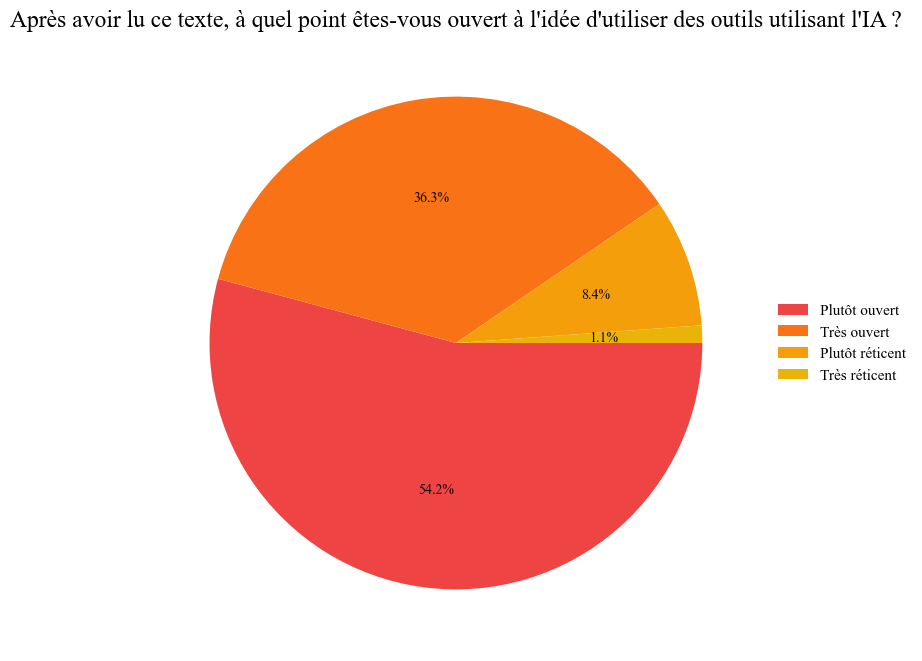

In [774]:
plot_pie('Openness', "Après avoir lu ce texte, à quel point êtes-vous ouvert à l'idée d'utiliser des outils utilisant l'IA ?")

## ❓ 8&9. Dans le cadre de votre travail, dans quelle mesure utilisez-vous des outils basés sur l'IA ? Utilisez-vous les outils suivants ?
---

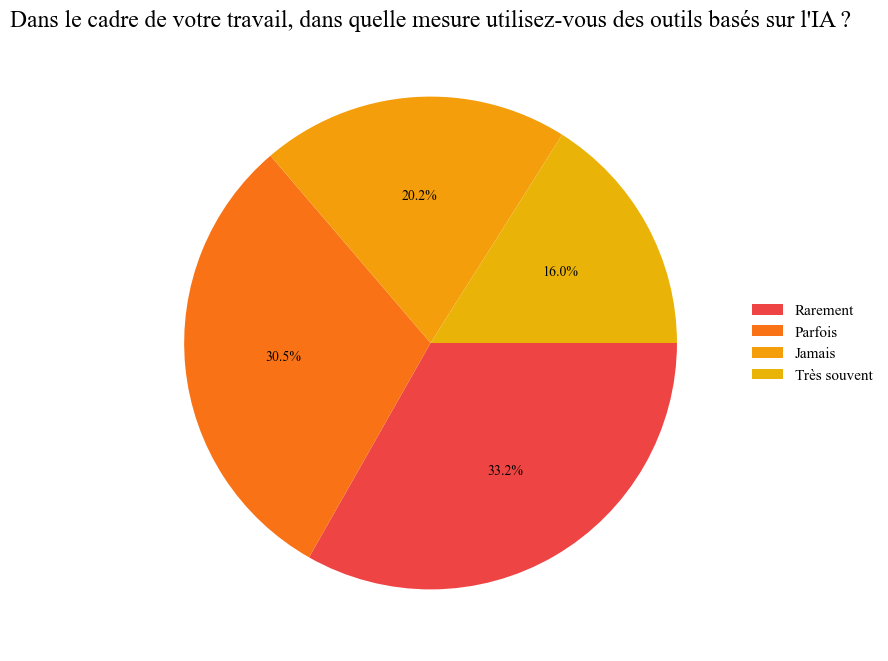

In [775]:
plot_pie('Usage', "Dans le cadre de votre travail, dans quelle mesure utilisez-vous des outils basés sur l'IA ?")

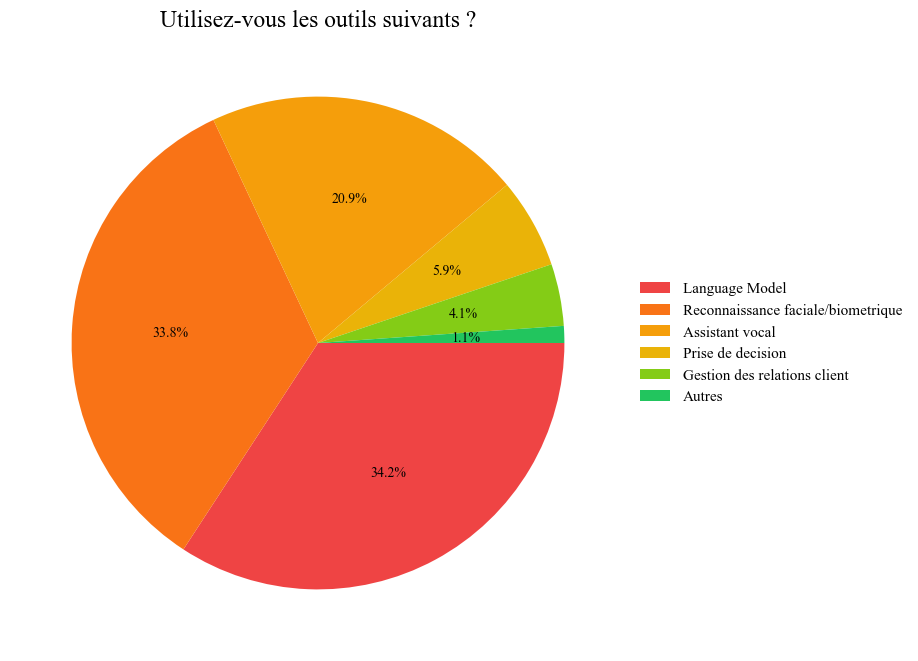

In [776]:
plot_pie('Tools', 'Utilisez-vous les outils suivants ?')

### 📜 Annexe 🗺️ Moyenne d'utilisation de l'IA par secteur et service

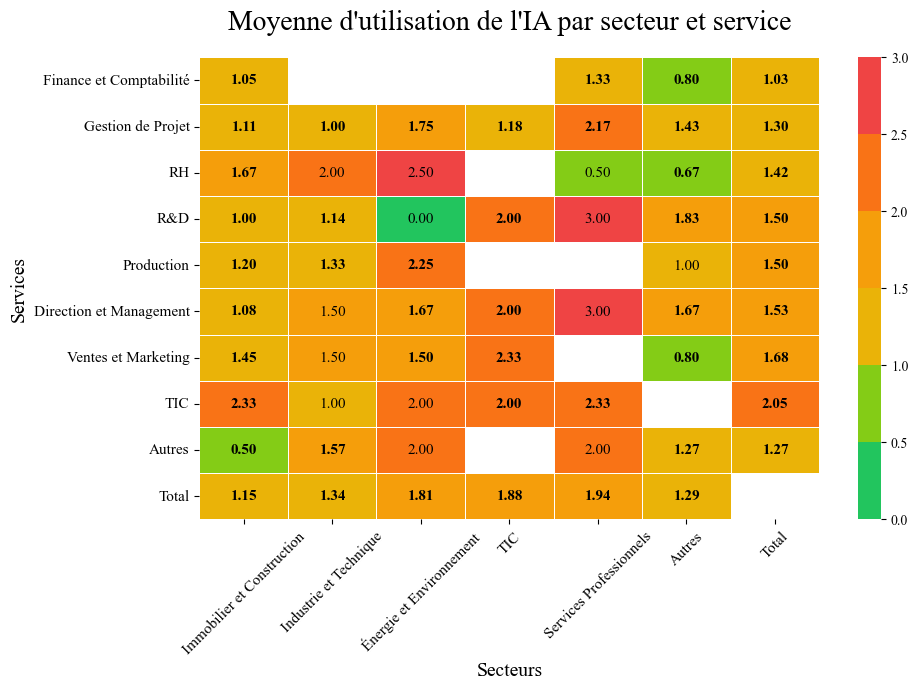

In [777]:
#TODO on peut ordonner l'affichage en fonction des means
# 3&4/6 *Usage to AI by Sector and Department
COLORS = [C_PALETTE_3[5], C_PALETTE_3[4], C_PALETTE_3[3], C_PALETTE_3[2], C_PALETTE_3[1], C_PALETTE_3[0]]
DEPARTMENT_THRESHOLD = 10
SECTOR_THRESHOLD = 10
MIN_COUNT_THRESHOLD = 3
OTHER_LABEL = 'Autres'
TOT_LABEL = 'Total'

# Filter departments and sectors with more than threshold responses
valid_departments = df_survey['Department'].value_counts()[lambda x: x > DEPARTMENT_THRESHOLD].index
valid_sectors = df_survey['Sector'].value_counts()[lambda x: x > SECTOR_THRESHOLD].index

# Filter dataframe based on valid departments and sectors
filtered_df = df_survey[df_survey['Department'].isin(valid_departments) & df_survey['Sector'].isin(valid_sectors)]
filtered_df = filtered_df[['Department', 'Sector', '*Usage']]

for index, row in df_survey.iterrows():
    new_rows = []
    if row['Department'] in valid_departments:
        if row['Sector'] not in valid_sectors:
            new_rows.append({'Department': row['Department'], 'Sector': OTHER_LABEL, '*Usage': row['*Usage']})
    if row['Sector'] in valid_sectors:
        if row['Department'] not in valid_departments:
            new_rows.append({'Department': OTHER_LABEL, 'Sector': row['Sector'], '*Usage': row['*Usage']})
    else:
        new_rows.append({'Department': OTHER_LABEL, 'Sector': OTHER_LABEL, '*Usage': row['*Usage']})

    filtered_df = pd.concat([filtered_df, pd.DataFrame(new_rows)], ignore_index=True)

all_sectors = list(valid_sectors) + [OTHER_LABEL]
all_departments = list(valid_departments) + [OTHER_LABEL]

# Calculate percentage of 'Non' for each valid sector and department
table_data = pd.DataFrame(index=all_departments, columns=all_sectors, dtype=float)
table_data_count = pd.DataFrame(index=all_departments, columns=all_sectors, dtype=int)

department_totals = {department: 0 for department in all_departments}
sector_totals = {sector: 0 for sector in all_sectors}

for department in all_departments:
    for sector in all_sectors:
        subset = filtered_df[(filtered_df['Department'] == department) & (filtered_df['Sector'] == sector)]
        count = len(subset)
        if len(subset) > 0:
            mean = subset['*Usage'].mean()
            table_data.loc[department, sector] = mean
            department_totals[department] += mean*count
            sector_totals[sector] += mean*count
        table_data_count.loc[department, sector] = count

# Total mean of lines and columns
for department in department_totals.keys():
    if department in table_data_count.index:  # Vérifiez si le département existe
        department_sum = table_data_count.loc[department].sum()
        if department_sum > 0:
            department_totals[department] /= department_sum
    else:
        department_totals[department] = 0  # Attribuez une valeur par défaut si le département n'existe pas

for sector in sector_totals.keys():
    if sector in table_data_count.columns:  # Vérifiez si le secteur existe
        sector_sum = table_data_count[sector].sum()
        if sector_sum > 0:
            sector_totals[sector] /= sector_sum
    else:
        sector_totals[sector] = 0  # Attribuez une valeur par défaut si le secteur n'existe pas

# Add totals to the table
for department in all_departments:
    table_data.loc[department, TOT_LABEL] = department_totals[department]
    table_data_count.loc[department, TOT_LABEL] = sum(table_data_count.loc[department, all_sectors])
for sector in all_sectors:
    table_data.loc[TOT_LABEL, sector] = sector_totals[sector]
    table_data_count.loc[TOT_LABEL, sector] = sum(table_data_count.loc[all_departments, sector])

# Sort rows and columns by total values
sorted_departments = table_data[TOT_LABEL].sort_values().index
sorted_sectors = table_data.loc[TOT_LABEL].sort_values().index

# Move OTHER_LABEL just before TOT_LABEL
if OTHER_LABEL in sorted_departments:
    sorted_departments = sorted_departments.drop(OTHER_LABEL).insert(-1, OTHER_LABEL)
if OTHER_LABEL in sorted_sectors:
    sorted_sectors = sorted_sectors.drop(OTHER_LABEL).insert(-1, OTHER_LABEL)

# Reorder table_data and table_data_count
table_data = table_data.loc[sorted_departments, sorted_sectors]
table_data_count = table_data_count.loc[sorted_departments, sorted_sectors]

cmap = mcolors.ListedColormap(COLORS)

# Plot heatmap with red background
plt.figure(figsize=(10, 6))
ax = sns.heatmap(table_data, cmap=cmap, cbar=True, linewidths=.5)

# Add annotations manually
for i in range(table_data_count.shape[0]):
    for j in range(table_data_count.shape[1]):
        if not pd.isna(table_data.iloc[i, j]):
            if table_data_count.iloc[i, j] >= MIN_COUNT_THRESHOLD:
                ax.text(j+0.5, i+0.5, f"{table_data.iloc[i, j]:.2f}",
                        color='black', ha='center', va='center',
                        fontweight='bold', fontsize=F_H4)
            else:
                ax.text(j+0.5, i+0.5, f"{table_data.iloc[i, j]:.2f}",
                        color='black', ha='center', va='center',
                        fontsize=F_H4)

plt.title("Moyenne d'utilisation de l'IA par secteur et service", fontsize=F_H1, pad=20)
plt.xlabel('Secteurs', fontsize=F_H3)
plt.ylabel('Services', fontsize=F_H3)
plt.xticks(rotation=45, fontsize=F_H4)
plt.yticks(fontsize=F_H4)
plt.show()

## ❓ 10. Quelles sont vos principales motivations pour utiliser au travail des outils basés sur l'IA ?
---

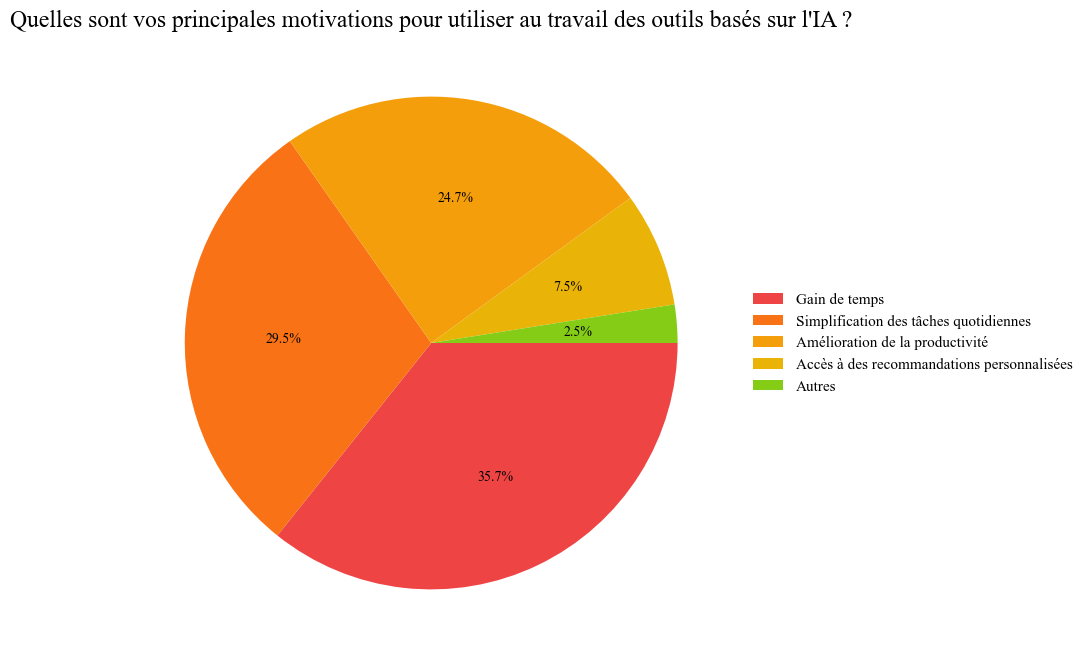

In [778]:
plot_pie('Motivations', "Quelles sont vos principales motivations pour utiliser au travail des outils basés sur l'IA ?")

### 📜 Annexe 🛞 Répartition des motivations par niveau d'ouverture à l'IA

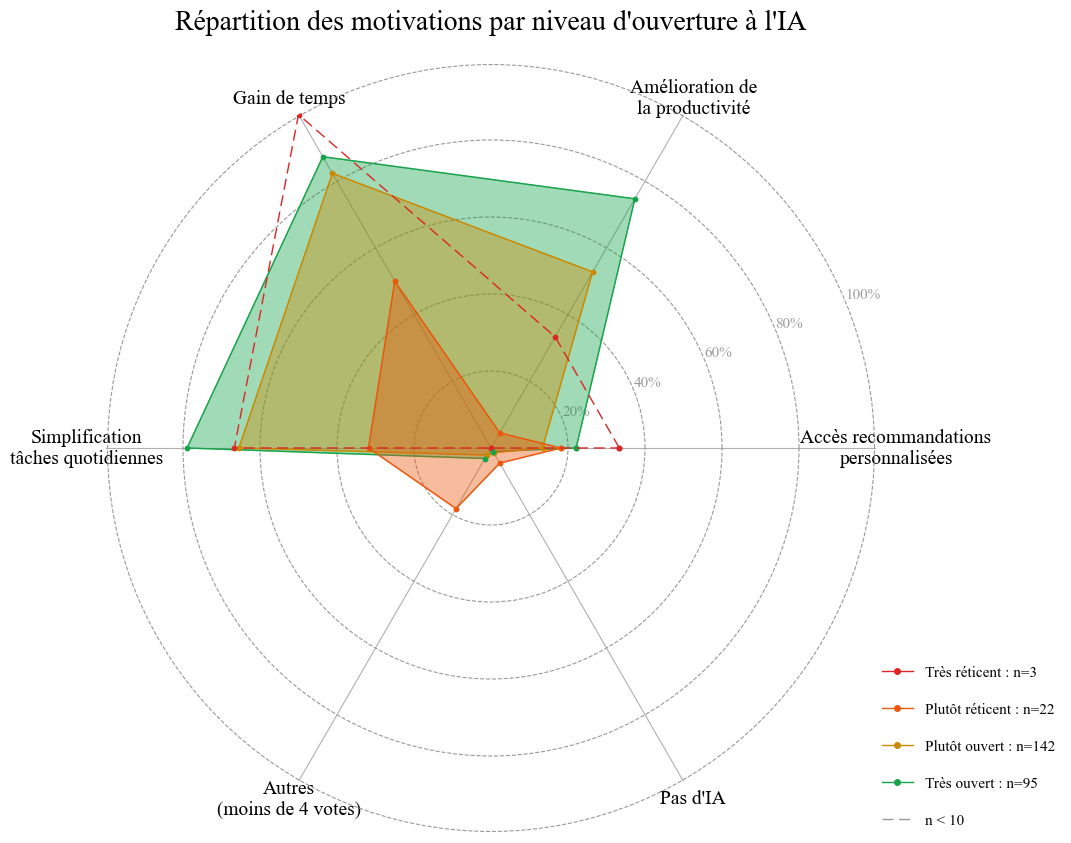

In [779]:
MIN_PARTICIPATION_FILTER = 4
WEB_COLOR = '#999999'
TINT = 4

# C_RED, C_ORANGE, C_AMBER, C_YELLOW, C_LIME, C_GREEN

COLORS = [C_RED[TINT], C_ORANGE[TINT],C_YELLOW[TINT], C_GREEN[TINT]]

openness_labels = {
    3: 'Très ouvert',
    2: 'Plutôt ouvert',
    1: 'Plutôt réticent',
    0: 'Très réticent'
}

# Filtrage initial
df_filtered = df_survey.loc[~df_survey['Motivations'].str.contains("Pas d'IA", na=False)].copy()
df_filtered['Motivations'] = df_filtered['Motivations'].apply(lambda m_set: [m for m in m_set if m])

# Comptage de l'ouverture
openness_counts = df_filtered['*Openness'].value_counts()

# Gestion des motivations 'Autres'
motivations_counts = df_filtered.explode('Motivations')['Motivations'].value_counts()
other_motivations = motivations_counts[motivations_counts < MIN_PARTICIPATION_FILTER].index
df_filtered['Motivations'] = df_filtered['Motivations'].apply(lambda m_set: [m if m not in other_motivations else 'Autres' for m in m_set])

# Transformation en DataFrame long
df_motivations = df_filtered.explode('Motivations')

# Calcul des comptes et pourcentages
df_counts = df_motivations.groupby(['*Openness', 'Motivations']).size().reset_index(name='counts')
df_counts['percentage'] = df_counts.apply(lambda x: (x['counts'] / openness_counts[x['*Openness']]) * 100, axis=1)

# Ajout des lignes manquantes pour chaque combinaison d'ouverture et de motivation
all_combinations = pd.MultiIndex.from_product([df_counts['*Openness'].unique(), df_counts['Motivations'].unique()], names=['*Openness', 'Motivations'])
df_counts = df_counts.set_index(['*Openness', 'Motivations']).reindex(all_combinations, fill_value=0).reset_index()
df_counts['percentage'] = (df_counts['counts'] / df_counts['*Openness'].map(openness_counts)) * 100

# Préparation des données pour le tracé
motivations = df_counts['Motivations'].unique()
num_motivations = len(motivations)
axis_angles = np.linspace(0, 2 * np.pi, num_motivations, endpoint=False).tolist()
axis_angles += axis_angles[:1]

# Convertir les motivations en Series pour utiliser la méthode replace
motivations_series = pd.Series(df_counts['Motivations'].unique())
motivations_series = motivations_series.replace('Autres', 'Autres\n(moins de 4 votes)')
motivations_series = motivations_series.replace('Simplification des tâches quotidiennes', 'Simplification\ntâches quotidiennes')
motivations_series = motivations_series.replace('Accès à des recommandations personnalisées', 'Accès recommandations\npersonnalisées')
motivations_series = motivations_series.replace('Amélioration de la productivité', 'Amélioration de\nla productivité')
motivations_rename = motivations_series.tolist()

# Tracé
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
plt.title("Répartition des motivations par niveau d'ouverture à l'IA", va='bottom', fontsize=F_H1 ,pad=20)

# Suppression des bordures
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

plt.xticks(axis_angles[:-1], motivations_rename, fontsize=F_H3)
plt.yticks([20, 40, 60, 80, 99.6], ["20%", "40%", "60%", "80%", "100%"], color=WEB_COLOR, fontsize=F_H4)
plt.ylim(0, 100)
ax.yaxis.grid(True, linestyle='--', color=WEB_COLOR, linewidth=0.8, dash_capstyle='butt')

for idx, openness in enumerate(sorted(openness_labels.keys())):
    filtered_data = df_counts[df_counts['*Openness'] == openness]
    values = filtered_data.set_index('Motivations').reindex(motivations)['percentage'].fillna(0).tolist()
    values += values[:1]
    if openness != 0:
      ax.fill(axis_angles, values, c=COLORS[idx], alpha=0.4, zorder=10-idx)
      ax.plot(axis_angles, values, c=COLORS[idx], linewidth=1, linestyle='solid', label=openness_labels[openness], zorder=10-idx)
    else :
      ax.plot(axis_angles, values, c=COLORS[idx], linewidth=1, linestyle='--', dashes=[8, 4], label=openness_labels[openness], zorder=100)
    ax.scatter(axis_angles, values, s=10, c=COLORS[idx], zorder=10)

# Ajout de la légende au graphique avec les handles personnalisés
handles = [
    Line2D([], [], c=color, lw=1, marker="o", markersize=4, label=f"{openness_labels[openness]} : n={openness_counts[openness]}")
    for openness, color in zip(sorted(openness_labels.keys()), COLORS)
]
handles.append(Line2D([], [], c=WEB_COLOR, lw=1, linestyle='--', dashes=[8, 4], label='n < 10'))
legend = ax.legend(handles=handles, loc=(1, 0), fontsize=F_H4, labelspacing=1.5, frameon=False)

plt.show()

## ❓ 11. Dans le cas où vous auriez utilisé un outil avec de l’IA, avez-vous déjà rencontré des problèmes ou des désagréments liés à son utilisation ?
---

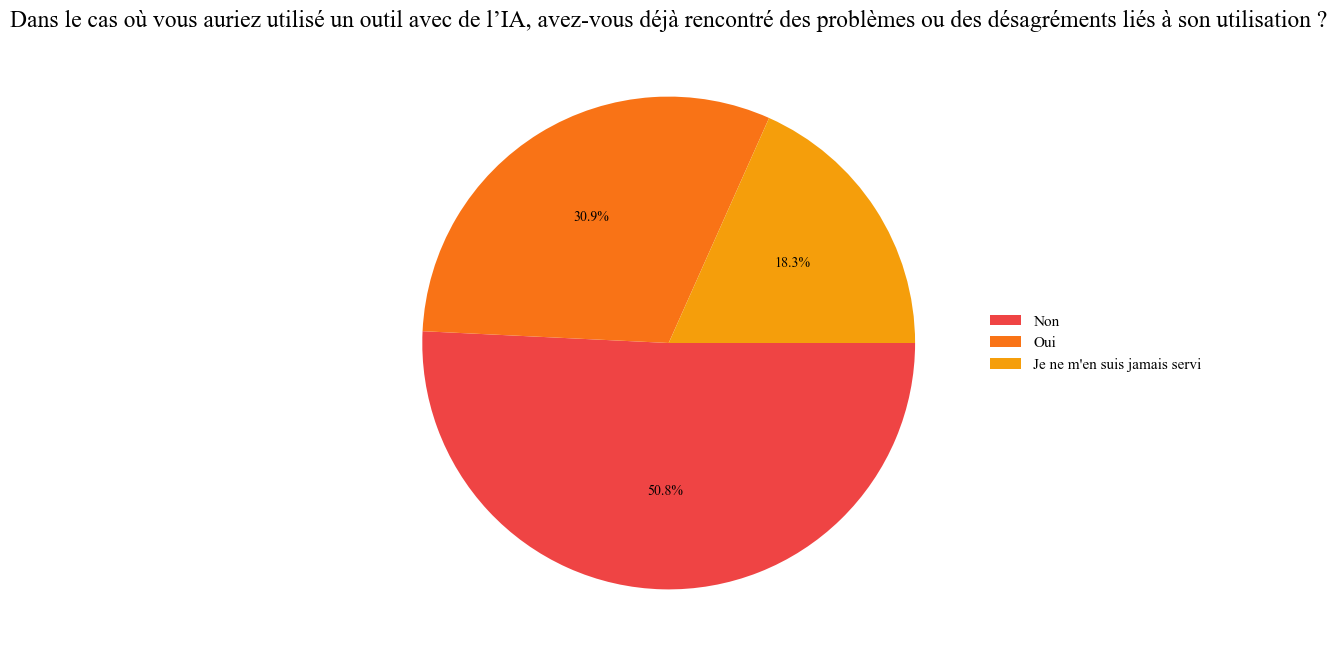

In [780]:
plot_pie('Issues', 'Dans le cas où vous auriez utilisé un outil avec de l’IA, avez-vous déjà rencontré des problèmes ou des désagréments liés à son utilisation ?')

## ❓ 12. Comment évaluez-vous votre confiance dans les décisions prises par les systèmes basés sur l'IA ?
---

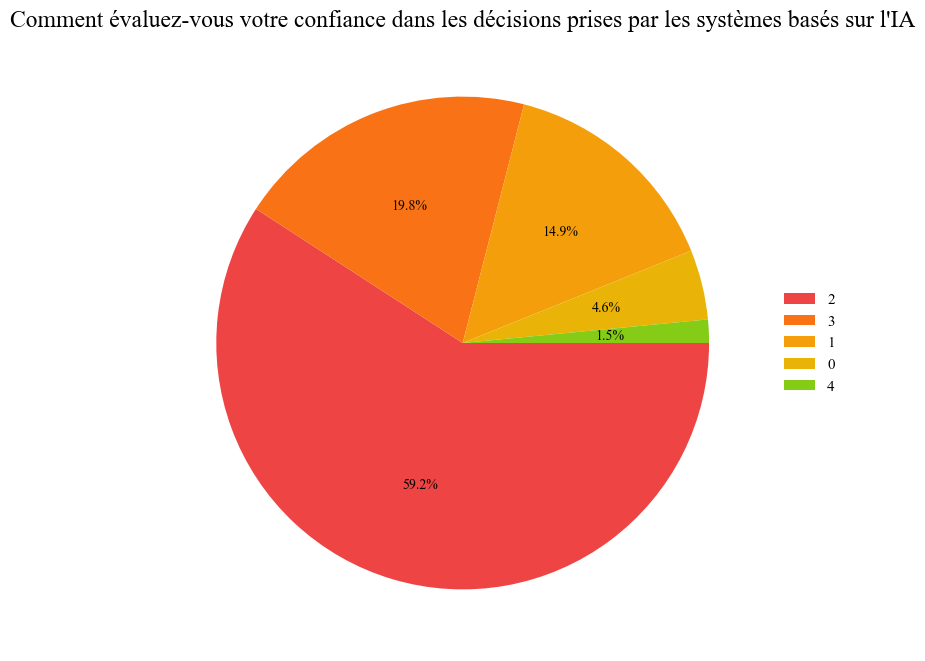

In [781]:
plot_pie('Trust', "Comment évaluez-vous votre confiance dans les décisions prises par les systèmes basés sur l'IA")

## ❓ 13. Avez-vous des inquiétudes quant à la manière dont l’IA peut affecter votre vie professionnelle ?
---

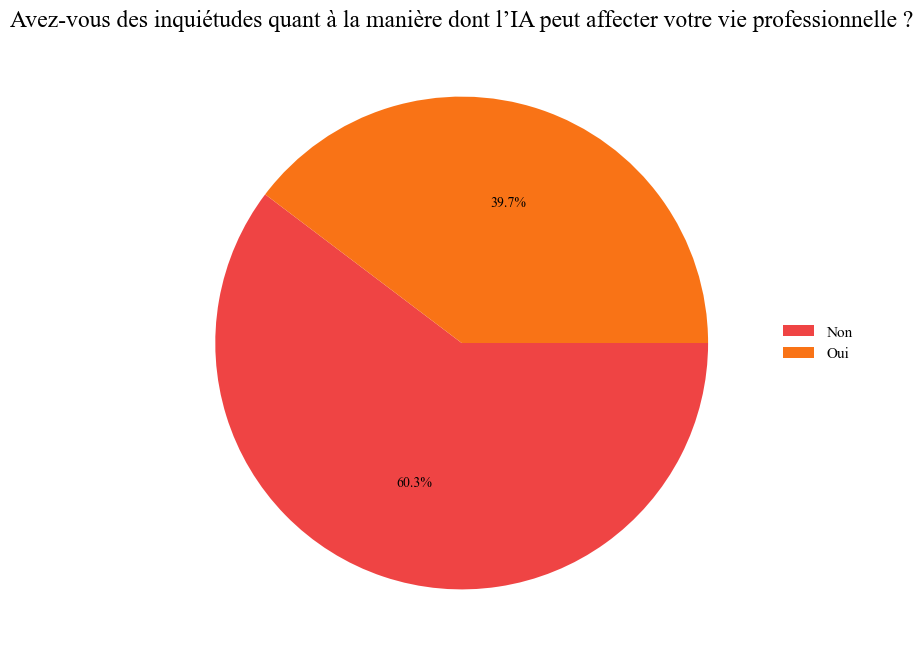

In [782]:
plot_pie('Concerns', 'Avez-vous des inquiétudes quant à la manière dont l’IA peut affecter votre vie professionnelle ?')

## ❓ 14. Dans quelle mesure pensez-vous que l'IA pourrait vous faire perdre votre autonomie ?
---

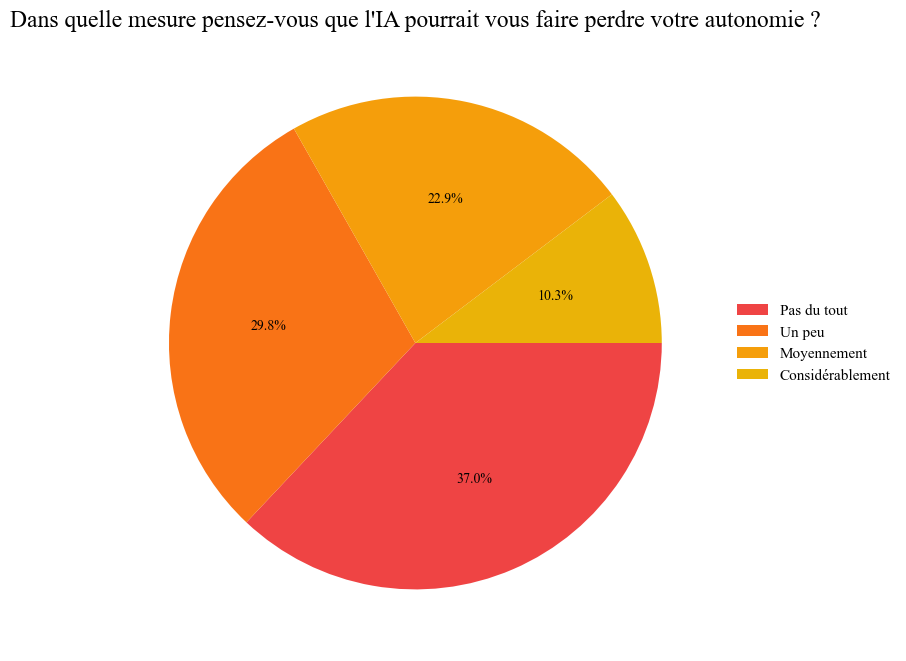

In [783]:
plot_pie('LossOfAutonomy', "Dans quelle mesure pensez-vous que l'IA pourrait vous faire perdre votre autonomie ?")

## ❓ 15. Dans quelle mesure pensez-vous que l'IA pourrait réduire vos capacités de réflexion ?
---

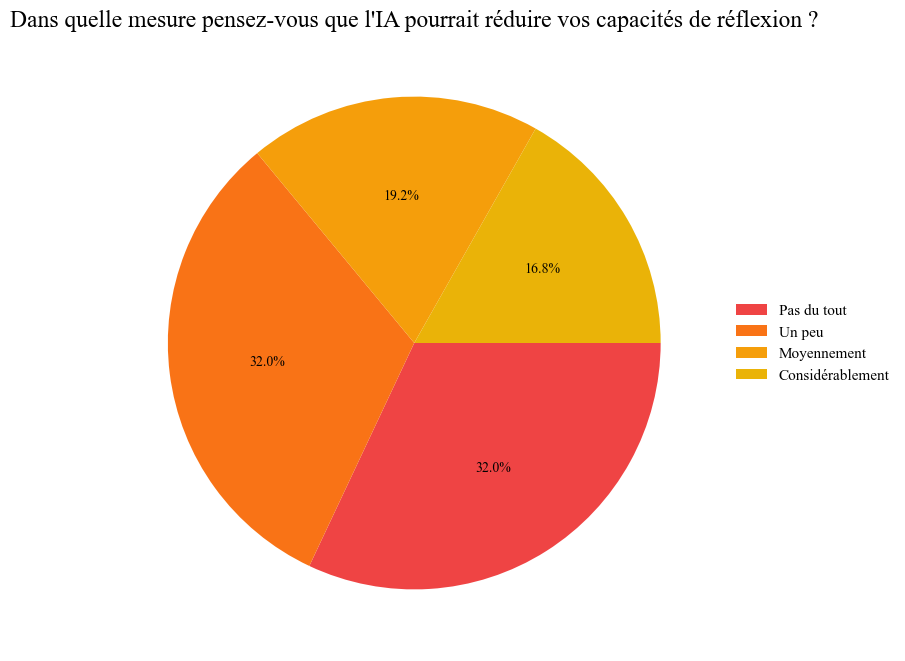

In [784]:
plot_pie('ReducedThinking', "Dans quelle mesure pensez-vous que l'IA pourrait réduire vos capacités de réflexion ?")

## ❓ 16. Craignez-vous que l'IA ne vous fasse perdre votre emploi ?
---

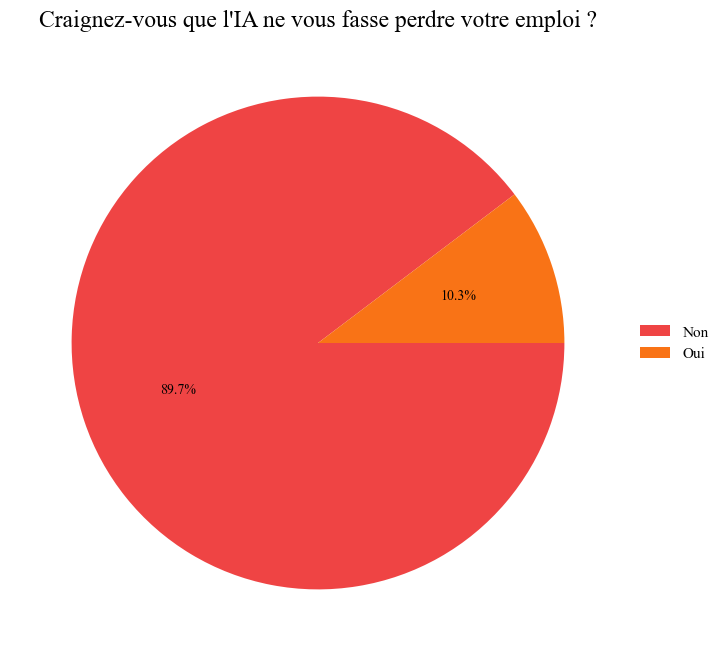

L'IA est encore trop bête pour ça, et je pense que j'ai le temps avant qu'elle devienne suffisamment intelligente pour me voler mon travail.
Métier de contrôle indispensable
L'utilisation de l'IA requiert un utilisateur disposant d'esprit critique et de culture de son métier pour valider la donnée obtenue par IA
L'IA doit être une aide mais la décision et le regard critique reste à ma main
Les taches à plus forte valeur ajoutée resteront à la main des humains
Mon domaine dactivite necessite du travail de terrain que l'IA ne peut pas effectuer et de lanalyse juridique. Tout les aspects de calculs et de dessins arctecturaux pourraient etre affecté, mais pas toute la profession pour autant.
xx
pas de crainte dans le métier de commercial B to C car il faut un contact humain qui peut aider à la prise de décision.
L'IA serait un atout pour augmenter en compétence.
Il y aura toujours besoin de relations humaines dans le cadre de mon métier
C'est un outil et seulement un outil.
La conduite de 

In [785]:
plot_pie('FearOfJobLoss', "Craignez-vous que l'IA ne vous fasse perdre votre emploi ?")

for response in df_survey['FearOfJobLossDetails'].dropna():
  print(response)

## ❓ 17. Avez-vous d’autres inquiétudes vis-à-vis de votre travail face à l’arrivée de l’IA ?
---

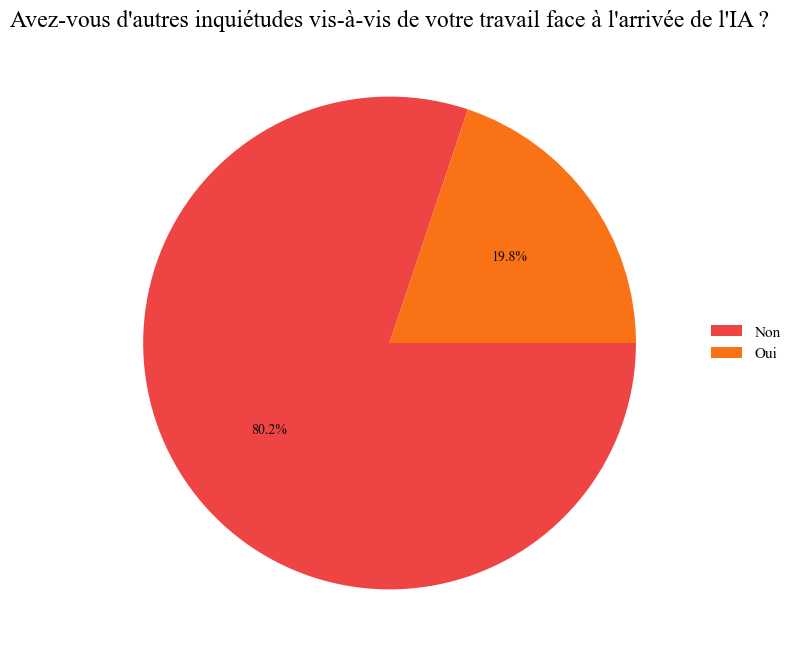

["Les services externes d'IA sont une très grosse brèche de sécurité : je ne peux pas demander à ChatGPT d'écrire du code pour moi sans briser les clauses de non-divulgation de mon contrat. Au niveau de la génération d'images, on a également des risques au niveau des droits d'auteur, qui est encore quelque chose d'assez flou.",
 "Ne pas savoir suffisamment bien l'utiliser au quotidien et perdre en productivité par rapport à d'autres qui auraient été mieux formés",
 'Le fonctionnement de l’IA doit être transparent pour les utilisateurs et les algorithmes ouverts à tous afin de contrôler d’éventuels dysfonctionnements',
 "l'accompagnement de l'entreprise et des collaborateurs : tous les embarquer",
 "Un paresse d'esprit, vol de données, perte de la dimension humaine et affective,....",
 "Grosse perte en compétence, du savoir-faire et manque d'humanité dans le travail (je ne suis pas travaillé avec une IA comme collègue). Cela doit rester un outil.",
 'Non plus sur le domaine personnel (s

In [786]:
plot_pie('OtherConcerns', "Avez-vous d'autres inquiétudes vis-à-vis de votre travail face à l'arrivée de l'IA ?")

responses = []
for response in df_survey['OtherConcernsDetails'].dropna():
  responses.append(response)
display(responses)

## ❓ 18. Avez-vous été inclus dans l’une des phases de développement d’outils basés sur l’IA dans votre entreprise ?
---

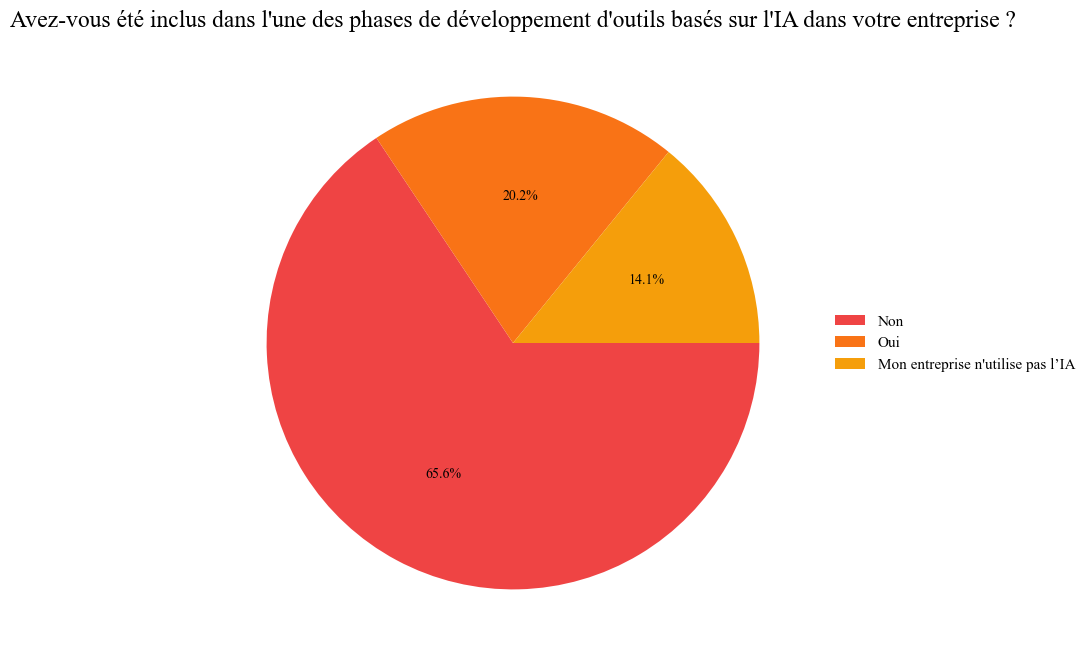

In [787]:
plot_pie('Involved', "Avez-vous été inclus dans l'une des phases de développement d'outils basés sur l'IA dans votre entreprise ?")

### 📜 Annexe 📊 Familiarité avec l'IA en fonction des implications dans le développement d'outils basés sur de l'IA

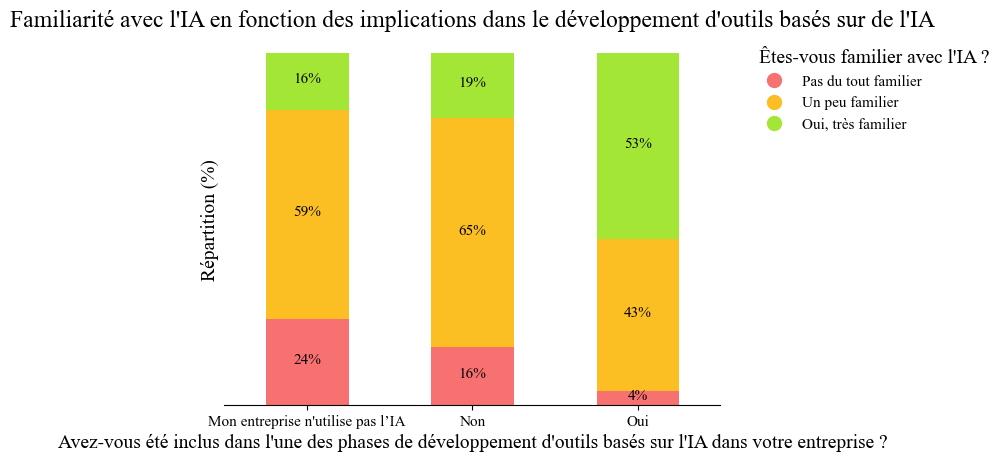

In [788]:
TINT = 2
COLORS = [C_RED[TINT], C_AMBER[TINT], C_LIME[TINT]]

# Familiarité pour ceux inclus dans le développement d'outils basés sur l'IA vs Non vs Mon entreprise n'utilise pas l'IA
familiarity_involvement_bar = df_survey.groupby(['Involved', 'Familiarity'], observed=True).size().unstack()

# Convert counts to percentages
familiarity_age_percentage = familiarity_involvement_bar.div(familiarity_involvement_bar.sum(axis=1), axis=0) * 100
ax = familiarity_age_percentage.plot(kind='bar', stacked=True, color=COLORS)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('none')
ax.set_yticks([])

# Add percentages on top of each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + (height*0.5-0.5)), ha='center', color='black', fontsize=F_H4)

plt.title("Familiarité avec l'IA en fonction des implications dans le développement d'outils basés sur de l'IA", fontsize=F_H2)
plt.xlabel("Avez-vous été inclus dans l'une des phases de développement d'outils basés sur l'IA dans votre entreprise ?", fontsize=F_H3)
plt.ylabel('Répartition (%)', fontsize=F_H3)
plt.xticks(rotation=0, fontsize=F_H4)

# Créer les handles pour la légende
handles = [
    Line2D([], [], marker='o', markersize=10, color=color, label=label, linestyle='None')
    for label, color in zip(FAMILIARITY_ORDER, COLORS)
]

# Ajouter la légende au graphique
ax.legend(handles=handles,
          title="Êtes-vous familier avec l'IA ?",
          frameon=False,
          bbox_to_anchor=(1.05, 1),
          loc='upper left',
          title_fontsize=F_H3,
          alignment='left',
          fontsize=F_H4)

plt.show()

## ❓ 19. Dans le futur, aimeriez-vous être consulté pour l’élaboration d’un outil basé sur l’IA qui sera intégré dans votre entreprise ?
---

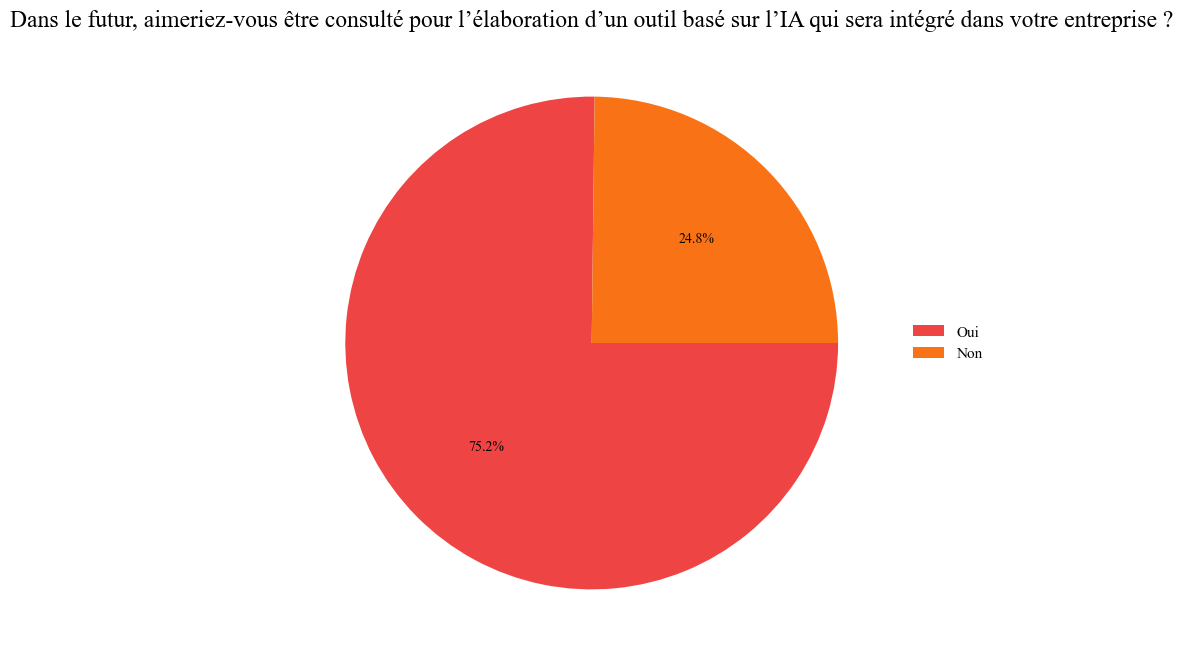

In [789]:
plot_pie('WantToBeInvolved', 'Dans le futur, aimeriez-vous être consulté pour l’élaboration d’un outil basé sur l’IA qui sera intégré dans votre entreprise ?')

## ❓ 20. Si vous étiez consulté, seriez-vous plus enclin à vous servir de l’IA dans votre travail ?
---

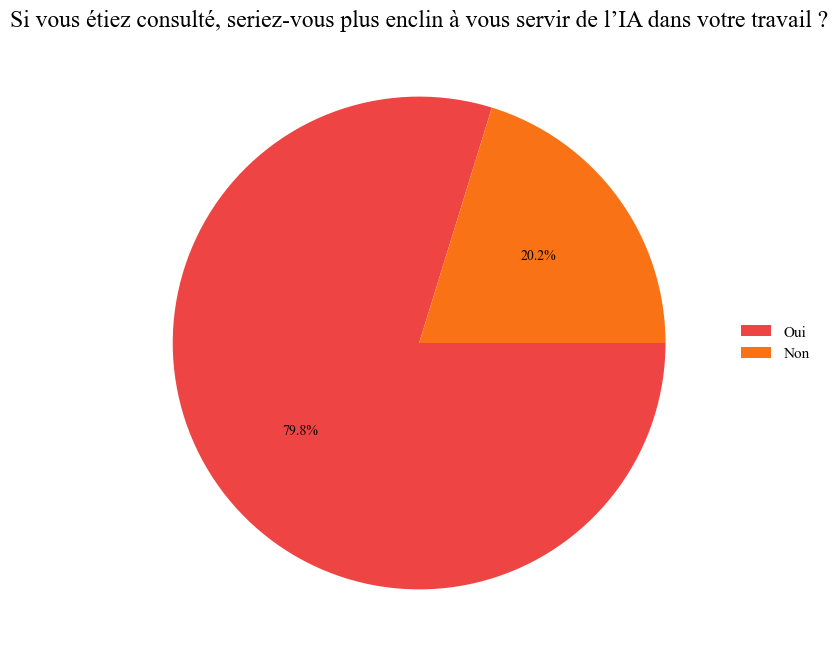

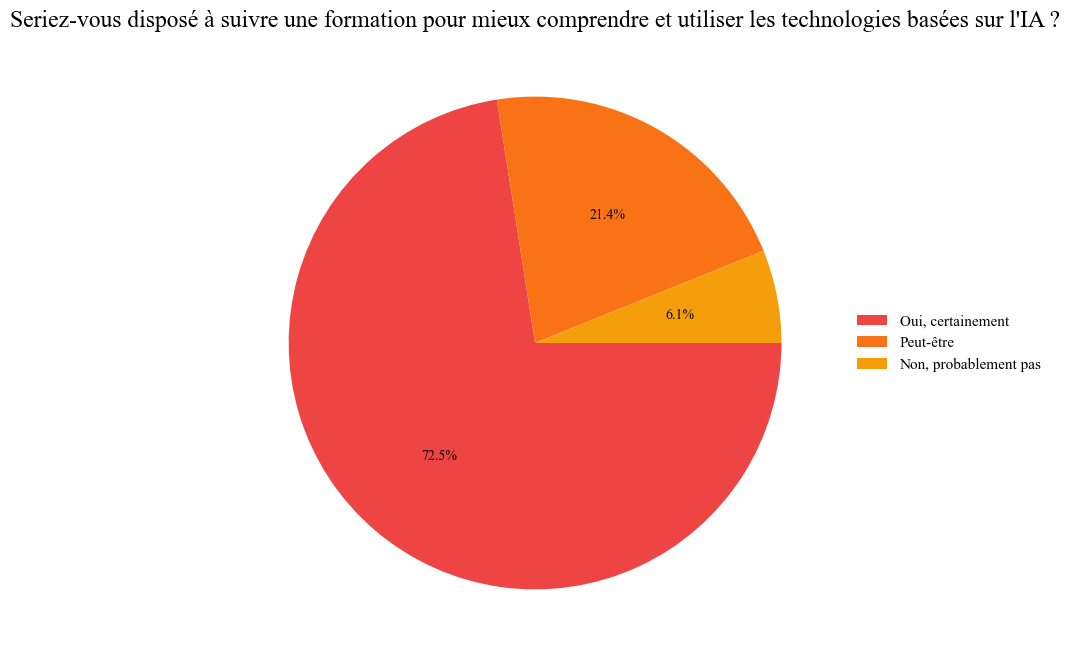

In [790]:
plot_pie('ImpactOfBeingInvolved', 'Si vous étiez consulté, seriez-vous plus enclin à vous servir de l’IA dans votre travail ?')

plot_pie('WillingnessForTraining', "Seriez-vous disposé à suivre une formation pour mieux comprendre et utiliser les technologies basées sur l'IA ?")
